<a href="https://colab.research.google.com/github/nupur-19-hub/Tourism_labmentix/blob/main/Tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tourism Experience Analytics**

##  **Problem Statement:**
Tourism agencies and travel platforms aim to enhance user experiences by leveraging data to provide personalized recommendations, predict user satisfaction, and classify potential user behavior. This project involves analyzing user preferences, travel patterns, and attraction features to achieve three primary objectives: regression, classification, and recommendation. **


## Project type:Regression, Classification & Recommendation

# Task
Load the Excel files: "Mode.xlsx", "Country.xlsx", "Type.xlsx", "City.xlsx", "Region.xlsx", "Item.xlsx", "Updated_Item.xlsx", "Continent.xlsx", and "Transaction.xlsx" into pandas DataFrames. Inspect each DataFrame by displaying its shape, column names, data types, and the first 5 rows. Then, analyze the loaded DataFrames to identify and describe potential key relationships between them. Finally, summarize the loaded data and the identified table relationships.

### Load and Inspect Data

#### Subtask:
Load each of the provided Excel files into a pandas DataFrame. For each DataFrame, display its shape, column names, data types, and the first 5 rows.


**Reasoning**:
First, I'll import the pandas library to enable data manipulation with DataFrames. This is a foundational step for loading and inspecting the Excel files.



In [ ]:
import pandas as pd
print("Pandas library imported successfully.")

Pandas library imported successfully.


**Reasoning**:
I will create a list of Excel filenames, then iterate through each file to load it into a pandas DataFrame, display its shape, column types, and the first 5 rows, as per the subtask instructions.



In [ ]:
excel_files = [
    "Mode.xlsx",
    "Country.xlsx",
    "Type.xlsx",
    "City.xlsx",
    "Region.xlsx",
    "Item.xlsx",
    "Updated_Item.xlsx",
    "Continent.xlsx",
    "Transaction.xlsx",
    "User.xlsx"
]

dataframes = {}
for file_name in excel_files:
    df_name = 'df_' + file_name.replace('.xlsx', '').lower()
    try:
        df = pd.read_excel(f'/content/{file_name}')
        dataframes[df_name] = df
        print(f"\n--- Inspecting {file_name} ---")
        print(f"Shape: {df.shape}")
        print("Column Information:")
        df.info()
        print("First 5 rows:")
        print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
    except FileNotFoundError:
        print(f"Error: File '{file_name}' not found. Please ensure it's in the correct directory.")
    except Exception as e:
        print(f"Error processing '{file_name}': {e}")


--- Inspecting Mode.xlsx ---
Shape: (6, 2)
Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   VisitModeId  6 non-null      int64 
 1   VisitMode    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes
First 5 rows:
| VisitModeId   | VisitMode   |
|:--------------|:------------|
| 0             | -           |
| 1             | Business    |
| 2             | Couples     |
| 3             | Family      |
| 4             | Friends     |

--- Inspecting Country.xlsx ---
Shape: (165, 3)
Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CountryId  165 non-null    int64 
 1   Country    165 non-null    object
 2   RegionId   165 non-null    int64 
dtypes: int

## Describe Table Relationships

### Subtask:
Analyze the loaded DataFrames to identify potential key relationships between them and print a short description of how the tables are related.


### Identified Table Relationships

Based on the inspection of the DataFrames, the following potential relationships can be observed:

-   **`df_mode` (Visit Mode Data)**
    -   **Primary Key:** `VisitModeId`
    -   **Relationship:** `VisitModeId` in `df_transaction` likely links to `VisitModeId` in `df_mode`.

-   **`df_country` (Country Data)**
    -   **Primary Key:** `CountryId`
    -   **Foreign Key:** `RegionId`
    -   **Relationship:** `RegionId` in `df_country` links to `RegionId` in `df_region`.
    -   **Relationship:** `CountryId` in `df_city` links to `CountryId` in `df_country`.

-   **`df_type` (Attraction Type Data)**
    -   **Primary Key:** `AttractionTypeId`
    -   **Relationship:** `AttractionTypeId` in `df_item` and `df_updated_item` links to `AttractionTypeId` in `df_type`.

-   **`df_city` (City Data)**
    -   **Primary Key:** `CityId`
    -   **Foreign Key:** `CountryId`
    -   **Relationship:** `CountryId` in `df_city` links to `CountryId` in `df_country`.
    -   **Relationship:** `AttractionCityId` in `df_item` and `df_updated_item` links to `CityId` in `df_city`.

-   **`df_region` (Region Data)**
    -   **Primary Key:** `RegionId`
    -   **Foreign Key:** `ContinentId`
    -   **Relationship:** `ContinentId` in `df_region` links to `ContinentId` in `df_continent`.
    -   **Relationship:** `RegionId` in `df_country` links to `RegionId` in `df_region`.

-   **`df_item` (Attraction Item Data)**
    -   **Primary Key:** `AttractionId`
    -   **Foreign Keys:** `AttractionCityId`, `AttractionTypeId`
    -   **Relationship:** `AttractionCityId` links to `CityId` in `df_city`.
    -   **Relationship:** `AttractionTypeId` links to `AttractionTypeId` in `df_type`.
    -   **Relationship:** `AttractionId` in `df_transaction` links to `AttractionId` in `df_item`.

-   **`df_updated_item` (Updated Attraction Item Data)**
    -   **Primary Key:** `AttractionId` (assuming it's an updated version of `df_item`)
    -   **Foreign Keys:** `AttractionCityId`, `AttractionTypeId`
    -   **Relationship:** `AttractionCityId` links to `CityId` in `df_city`.
    -   **Relationship:** `AttractionTypeId` links to `AttractionTypeId` in `df_type`.
    -   **Note:** This table seems to be an updated version or alternative to `df_item`. Further analysis would be needed to determine if it replaces or complements `df_item`.

-   **`df_continent` (Continent Data)**
    -   **Primary Key:** `ContinentId`
    -   **Relationship:** `ContinentId` in `df_region` links to `ContinentId` in `df_continent`.

-   **`df_transaction` (Transaction Data)**
    -   **Primary Key:** `TransactionId`
    -   **Foreign Keys:** `VisitMode`, `AttractionId`
    -   **Relationship:** `VisitMode` in `df_transaction` links to `VisitModeId` in `df_mode`.
    -   **Relationship:** `AttractionId` in `df_transaction` links to `AttractionId` in `df_item` (or `df_updated_item`).

## Final Task

### Subtask:
Summarize the loaded data and the identified table relationships.


## Summary:

### Data Analysis Key Findings

*   **Loaded Data Overview**: Nine Excel files (`Mode.xlsx`, `Country.xlsx`, `Type.xlsx`, `City.xlsx`, `Region.xlsx`, `Item.xlsx`, `Updated_Item.xlsx`, `Continent.xlsx`, and `Transaction.xlsx`) were successfully loaded into pandas DataFrames.
    *   `df_mode` (6 rows, 2 columns): Contains `VisitModeId` and `VisitMode`.
    *   `df_country` (165 rows, 3 columns): Contains `CountryId`, `Country`, and `RegionId`.
    *   `df_type` (17 rows, 2 columns): Contains `AttractionTypeId` and `AttractionType`.
    *   `df_city` (9143 rows, 3 columns): Contains `CityId`, `CityName`, and `CountryId`. Notably, `CityName` has only one non-null value, suggesting potential data quality issues.
    *   `df_region` (22 rows, 3 columns): Contains `Region`, `RegionId`, and `ContinentId`.
    *   `df_item` (30 rows, 5 columns): Contains `AttractionId`, `AttractionCityId`, `AttractionTypeId` (int64), `Attraction`, and `AttractionAddress`.
    *   `df_updated_item` (1698 rows, 5 columns): Similar to `df_item`, but its `AttractionTypeId` is of `object` dtype, which differs from `df_item`'s `int64`.
    *   `df_continent` (6 rows, 2 columns): Contains `ContinentId` and `Continent`.
    *   `df_transaction` (52930 rows, 7 columns): Contains `TransactionId`, `UserId`, `VisitYear`, `VisitMonth`, `VisitMode`, `AttractionId`, and `Rating`.

*   **Identified Table Relationships**:
    *   **Hierarchical Geographic Data**:
        *   `df_continent` (PK: `ContinentId`) links to `df_region` (FK: `ContinentId`).
        *   `df_region` (PK: `RegionId`) links to `df_country` (FK: `RegionId`).
        *   `df_country` (PK: `CountryId`) links to `df_city` (FK: `CountryId`).
    *   **Attraction-Related Data**:
        *   `df_type` (PK: `AttractionTypeId`) links to `df_item` and `df_updated_item` (FK: `AttractionTypeId`).
        *   `df_city` (PK: `CityId`) links to `df_item` and `df_updated_item` (FK: `AttractionCityId`).
    *   **Transaction Data**:
        *   `df_mode` (PK: `VisitModeId`) links to `df_transaction` (FK: `VisitMode`).
        *   `df_item` (or `df_updated_item`) (PK: `AttractionId`) links to `df_transaction` (FK: `AttractionId`).
    *   **Duplicate/Updated Item Data**: `df_item` and `df_updated_item` contain similar attraction information, but `df_updated_item` has significantly more entries (1698 vs. 30) and a different data type for `AttractionTypeId`.

### Insights or Next Steps

*   **Data Cleaning and Validation**: Investigate and rectify the `CityName` column in `df_city` (only 1 non-null value) and the `AttractionTypeId` data type inconsistency between `df_item` (int64) and `df_updated_item` (object).
*   **Data Integration Strategy**: Determine the intended use of `df_item` versus `df_updated_item`. It is likely that `df_updated_item` should replace `df_item`, or they need to be merged after resolving the `AttractionTypeId` data type mismatch.


# Task
The goal is to perform a comprehensive data cleaning and preparation on all loaded DataFrames. This involves identifying and handling missing values, removing duplicate rows, validating the 'Rating' range in `df_transaction`, addressing data type inconsistencies (e.g., `AttractionTypeId` in `df_updated_item` and `df_item`), handling issues like the `CityName` column in `df_city` which has only one non-null value, and standardizing categorical values. After cleaning, `df_item` should be replaced by the cleaned `df_updated_item`, and a summary table detailing all cleaning actions should be generated.

## Identify and Handle Missing Values

### Subtask:
Iterate through each DataFrame to identify columns with missing values and apply a logical imputation strategy. Keep track of the actions taken for the summary.


**Reasoning**:
I will initialize an empty dictionary `cleaning_summary` to store the imputation actions, then iterate through each DataFrame in the `dataframes` dictionary to identify and handle missing values based on the specified rules for `CityName` in `df_city`, `CityId` in `df_user`, and general rules for numerical and categorical columns, recording each action.



In [ ]:
cleaning_summary = {}

for df_name, df in dataframes.items():
    missing_values = df.isnull().sum()
    missing_cols = missing_values[missing_values > 0]

    if not missing_cols.empty:
        cleaning_summary[df_name] = {}
        for col_name in missing_cols.index:
            if df_name == 'df_city' and col_name == 'CityName':
                df[col_name].fillna('Unknown', inplace=True)
                cleaning_summary[df_name][col_name] = "Filled missing 'CityName' with 'Unknown'."
            elif df_name == 'df_user' and col_name == 'CityId':
                df[col_name].fillna(0, inplace=True)
                df[col_name] = df[col_name].astype('int64')
                cleaning_summary[df_name][col_name] = "Filled missing 'CityId' with 0 and converted to int64."
            else:
                if df[col_name].dtype in ['int64', 'float64']:
                    median_val = df[col_name].median()
                    df[col_name].fillna(median_val, inplace=True)
                    cleaning_summary[df_name][col_name] = f"Filled missing numerical column '{col_name}' with median value ({median_val})."
                elif df[col_name].dtype == 'object':
                    df[col_name].fillna('Unknown', inplace=True)
                    cleaning_summary[df_name][col_name] = f"Filled missing categorical column '{col_name}' with 'Unknown'."
                else:
                    cleaning_summary[df_name][col_name] = f"No specific imputation rule for column '{col_name}' with dtype {df[col_name].dtype}. Missing values remain or were handled generally."

print("Cleaning Summary:")
print(cleaning_summary)

Cleaning Summary:
{'df_city': {'CityName': "Filled missing 'CityName' with 'Unknown'."}, 'df_user': {'CityId': "Filled missing 'CityId' with 0 and converted to int64."}}


/tmp/ipython-input-2513289081.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col_name].fillna('Unknown', inplace=True)
/tmp/ipython-input-2513289081.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

**Reasoning**:
The previous code generated a `FutureWarning` due to the use of `inplace=True` in the `fillna()` method. To address this, I will modify the code to assign the result of `fillna()` back to the DataFrame column, which is the recommended practice for future Pandas versions.



In [ ]:
cleaning_summary = {}

for df_name, df in dataframes.items():
    missing_values = df.isnull().sum()
    missing_cols = missing_values[missing_values > 0]

    if not missing_cols.empty:
        cleaning_summary[df_name] = {}
        for col_name in missing_cols.index:
            if df_name == 'df_city' and col_name == 'CityName':
                dataframes[df_name][col_name] = df[col_name].fillna('Unknown')
                cleaning_summary[df_name][col_name] = "Filled missing 'CityName' with 'Unknown'."
            elif df_name == 'df_user' and col_name == 'CityId':
                dataframes[df_name][col_name] = df[col_name].fillna(0)
                dataframes[df_name][col_name] = dataframes[df_name][col_name].astype('int64')
                cleaning_summary[df_name][col_name] = "Filled missing 'CityId' with 0 and converted to int64."
            else:
                if df[col_name].dtype in ['int64', 'float64']:
                    median_val = df[col_name].median()
                    dataframes[df_name][col_name] = df[col_name].fillna(median_val)
                    cleaning_summary[df_name][col_name] = f"Filled missing numerical column '{col_name}' with median value ({median_val})."
                elif df[col_name].dtype == 'object':
                    dataframes[df_name][col_name] = df[col_name].fillna('Unknown')
                    cleaning_summary[df_name][col_name] = f"Filled missing categorical column '{col_name}' with 'Unknown'."
                else:
                    cleaning_summary[df_name][col_name] = f"No specific imputation rule for column '{col_name}' with dtype {df[col_name].dtype}. Missing values remain or were handled generally.

print("Cleaning Summary:")
print(cleaning_summary)


SyntaxError: unterminated f-string literal (detected at line 26) (ipython-input-2592358664.py, line 26)

**Reasoning**:
The previous code failed due to an unterminated f-string literal. I will add the missing closing double quote to the f-string to resolve the `SyntaxError`.



In [ ]:
cleaning_summary = {}

for df_name, df in dataframes.items():
    missing_values = df.isnull().sum()
    missing_cols = missing_values[missing_values > 0]

    if not missing_cols.empty:
        cleaning_summary[df_name] = {}
        for col_name in missing_cols.index:
            if df_name == 'df_city' and col_name == 'CityName':
                dataframes[df_name][col_name] = df[col_name].fillna('Unknown')
                cleaning_summary[df_name][col_name] = "Filled missing 'CityName' with 'Unknown'."
            elif df_name == 'df_user' and col_name == 'CityId':
                dataframes[df_name][col_name] = df[col_name].fillna(0)
                dataframes[df_name][col_name] = dataframes[df_name][col_name].astype('int64')
                cleaning_summary[df_name][col_name] = "Filled missing 'CityId' with 0 and converted to int64."
            else:
                if df[col_name].dtype in ['int64', 'float64']:
                    median_val = df[col_name].median()
                    dataframes[df_name][col_name] = df[col_name].fillna(median_val)
                    cleaning_summary[df_name][col_name] = f"Filled missing numerical column '{col_name}' with median value ({median_val})."
                elif df[col_name].dtype == 'object':
                    dataframes[df_name][col_name] = df[col_name].fillna('Unknown')
                    cleaning_summary[df_name][col_name] = f"Filled missing categorical column '{col_name}' with 'Unknown'."
                else:
                    cleaning_summary[df_name][col_name] = f"No specific imputation rule for column '{col_name}' with dtype {df[col_name].dtype}. Missing values remain or were handled generally."

print("Cleaning Summary:")
print(cleaning_summary)

**Reasoning**:
The previous code failed due to an unterminated f-string literal. I will add the missing closing double quote to the f-string to resolve the `SyntaxError`. The provided output for `cleaning_summary` being empty indicates that at the time of the previous execution, no missing values were detected in the dataframes, but the code structure itself is correct for handling missing values when they exist.



In [ ]:
cleaning_summary = {}

for df_name, df in dataframes.items():
    missing_values = df.isnull().sum()
    missing_cols = missing_values[missing_values > 0]

    if not missing_cols.empty:
        cleaning_summary[df_name] = {}
        for col_name in missing_cols.index:
            if df_name == 'df_city' and col_name == 'CityName':
                dataframes[df_name][col_name] = df[col_name].fillna('Unknown')
                cleaning_summary[df_name][col_name] = "Filled missing 'CityName' with 'Unknown'."
            elif df_name == 'df_user' and col_name == 'CityId':
                dataframes[df_name][col_name] = df[col_name].fillna(0)
                dataframes[df_name][col_name] = dataframes[df_name][col_name].astype('int64')
                cleaning_summary[df_name][col_name] = "Filled missing 'CityId' with 0 and converted to int64."
            else:
                if df[col_name].dtype in ['int64', 'float64']:
                    median_val = df[col_name].median()
                    dataframes[df_name][col_name] = df[col_name].fillna(median_val)
                    cleaning_summary[df_name][col_name] = f"Filled missing numerical column '{col_name}' with median value ({median_val})."
                elif df[col_name].dtype == 'object':
                    dataframes[df_name][col_name] = df[col_name].fillna('Unknown')
                    cleaning_summary[df_name][col_name] = f"Filled missing categorical column '{col_name}' with 'Unknown'."
                else:
                    cleaning_summary[df_name][col_name] = f"No specific imputation rule for column '{col_name}' with dtype {df[col_name].dtype}. Missing values remain or were handled generally."

print("Cleaning Summary:")
print(cleaning_summary)

## Remove Duplicate Rows

### Subtask:
For each DataFrame, identify and remove any exact duplicate rows. Record the number of duplicates removed from each DataFrame for the final summary.


**Reasoning**:
I will iterate through each DataFrame in the `dataframes` dictionary, calculate the number of duplicate rows, remove them using `drop_duplicates()`, and record the count of removed duplicates in the `cleaning_summary` dictionary, as per the instructions.



In [ ]:
for df_name, df in dataframes.items():
    initial_rows = len(df)
    df.drop_duplicates(inplace=True)
    removed_rows = initial_rows - len(df)

    if removed_rows > 0:
        if df_name not in cleaning_summary:
            cleaning_summary[df_name] = {}
        cleaning_summary[df_name]['duplicate_removal'] = f"Removed {removed_rows} duplicate rows."

print("Cleaning Summary after duplicate removal:")
print(cleaning_summary)

Cleaning Summary after duplicate removal:
{'df_city': {'CityName': "Filled missing 'CityName' with 'Unknown'."}, 'df_user': {'CityId': "Filled missing 'CityId' with 0 and converted to int64."}}


## Validate 'Rating' Range

### Subtask:
Validate the 'Rating' column in `df_transaction` to ensure its values are within a reasonable range (e.g., 1 to 5, or 1 to 10, depending on typical rating scales). If any values are outside this range, identify them and decide on a strategy to handle them (e.g., capping, removal, or imputation). Record any actions taken in the `cleaning_summary`.

**Reasoning**:
To validate the 'Rating' column, I first need to determine its range by inspecting its minimum and maximum values. This will help confirm what a 'reasonable range' should be, and identify any immediate outliers or unexpected values. I'll also add a check for the existence of the 'df_transaction' DataFrame and the 'Rating' column.



In [ ]:
if 'df_transaction' in dataframes and 'Rating' in dataframes['df_transaction'].columns:
    df_transaction = dataframes['df_transaction']
    min_rating = df_transaction['Rating'].min()
    max_rating = df_transaction['Rating'].max()
    print(f"'Rating' column in df_transaction - Min: {min_rating}, Max: {max_rating}")

    # Assuming a typical rating scale is 1 to 5. Adjust if initial inspection suggests otherwise.
    lower_bound = 1
    upper_bound = 5

    out_of_range_mask = (df_transaction['Rating'] < lower_bound) | (df_transaction['Rating'] > upper_bound)
    out_of_range_count = out_of_range_mask.sum()

    if out_of_range_count > 0:
        # Strategy: Cap the values to the valid range.
        # Optionally, one could remove these rows or impute, but capping preserves data and is reasonable for ratings.
        dataframes['df_transaction'].loc[df_transaction['Rating'] < lower_bound, 'Rating'] = lower_bound
        dataframes['df_transaction'].loc[df_transaction['Rating'] > upper_bound, 'Rating'] = upper_bound

        if 'df_transaction' not in cleaning_summary:
            cleaning_summary['df_transaction'] = {}
        cleaning_summary['df_transaction']['rating_validation'] = f"Capped {out_of_range_count} ratings to be within {lower_bound}-{upper_bound} range."
        print(f"Capped {out_of_range_count} ratings to be within {lower_bound}-{upper_bound} range.")
    else:
        if 'df_transaction' not in cleaning_summary:
            cleaning_summary['df_transaction'] = {}
        cleaning_summary['df_transaction']['rating_validation'] = "All 'Rating' values were already within the 1-5 range."
        print("All 'Rating' values were already within the 1-5 range.")
else:
    print("df_transaction or 'Rating' column not found.")

print("\nCleaning Summary:")
print(cleaning_summary)

'Rating' column in df_transaction - Min: 1, Max: 5
All 'Rating' values were already within the 1-5 range.

Cleaning Summary:
{'df_city': {'CityName': "Filled missing 'CityName' with 'Unknown'."}, 'df_user': {'CityId': "Filled missing 'CityId' with 0 and converted to int64."}, 'df_transaction': {'rating_validation': "All 'Rating' values were already within the 1-5 range."}}


## Address Data Type Inconsistencies

### Subtask:
Address data type inconsistencies, particularly for `AttractionTypeId` between `df_item` and `df_updated_item`. Convert `AttractionTypeId` in `df_updated_item` to `int64` to match `df_item`. Record this action in the `cleaning_summary`.

**Reasoning**:
I need to convert the `AttractionTypeId` column in `df_updated_item` to `int64`. I will first check if the column exists and then attempt the conversion. I'll handle potential errors by coercing non-numeric values to NaN, filling them with a placeholder (like 0), and then converting to `int64`.



In [ ]:
df_name = 'df_updated_item'
col_name = 'AttractionTypeId'

if df_name in dataframes and col_name in dataframes[df_name].columns:
    df = dataframes[df_name]
    original_dtype = df[col_name].dtype

    if original_dtype != 'int64':
        try:
            # Try direct conversion
            dataframes[df_name][col_name] = df[col_name].astype('int64')
            action = f"Converted '{col_name}' from {original_dtype} to int64 in {df_name}."
        except ValueError:
            # If direct conversion fails, try to clean and then convert
            dataframes[df_name][col_name] = pd.to_numeric(df[col_name], errors='coerce').fillna(0).astype('int64')
            action = f"Cleaned and converted '{col_name}' from {original_dtype} to int64 in {df_name} (coerced non-numeric to 0)."

        if df_name not in cleaning_summary:
            cleaning_summary[df_name] = {}
        cleaning_summary[df_name][col_name] = action
        print(action)
    else:
        action = f"'{col_name}' in {df_name} is already of type int64."
        if df_name not in cleaning_summary:
            cleaning_summary[df_name] = {}
        cleaning_summary[df_name][col_name] = action
        print(action)
else:
    print(f"{df_name} or '{col_name}' column not found.")

print("\nCleaning Summary:")
print(cleaning_summary)

Cleaned and converted 'AttractionTypeId' from object to int64 in df_updated_item (coerced non-numeric to 0).

Cleaning Summary:
{'df_city': {'CityName': "Filled missing 'CityName' with 'Unknown'."}, 'df_user': {'CityId': "Filled missing 'CityId' with 0 and converted to int64."}, 'df_transaction': {'rating_validation': "All 'Rating' values were already within the 1-5 range."}, 'df_updated_item': {'AttractionTypeId': "Cleaned and converted 'AttractionTypeId' from object to int64 in df_updated_item (coerced non-numeric to 0)."}}


## Standardize Categorical Values

### Subtask:
Standardize categorical values across all DataFrames by stripping leading/trailing whitespace and converting text to lowercase for object-type columns. Record these actions in the `cleaning_summary`.

**Reasoning**:
I will iterate through each DataFrame, identify columns with 'object' dtype, and apply string standardization (strip whitespace and convert to lowercase) to ensure consistency in categorical data. This action will be recorded in the `cleaning_summary` for each affected DataFrame and column.



In [ ]:
for df_name, df in dataframes.items():
    object_cols = df.select_dtypes(include='object').columns
    if not object_cols.empty:
        if df_name not in cleaning_summary:
            cleaning_summary[df_name] = {}

        actions_taken = []
        for col in object_cols:
            # Check if the column is actually a string type before applying .str accessor
            if df[col].apply(lambda x: isinstance(x, str)).any():
                initial_unique = df[col].nunique()
                dataframes[df_name][col] = df[col].astype(str).str.strip().str.lower()
                final_unique = dataframes[df_name][col].nunique()
                if initial_unique != final_unique:
                    actions_taken.append(f"Standardized '{col}' (stripped whitespace, lowercased, unique values changed from {initial_unique} to {final_unique}).")
                else:
                    actions_taken.append(f"Standardized '{col}' (stripped whitespace, lowercased).")
            else:
                actions_taken.append(f"Skipped '{col}' standardization as it contains non-string objects.")

        if actions_taken:
            cleaning_summary[df_name]['categorical_standardization'] = "; ".join(actions_taken)

print("Cleaning Summary after categorical standardization:")
print(cleaning_summary)

Cleaning Summary after categorical standardization:
{'df_city': {'CityName': "Filled missing 'CityName' with 'Unknown'.", 'categorical_standardization': "Standardized 'CityName' (stripped whitespace, lowercased, unique values changed from 8768 to 8752)."}, 'df_user': {'CityId': "Filled missing 'CityId' with 0 and converted to int64."}, 'df_transaction': {'rating_validation': "All 'Rating' values were already within the 1-5 range."}, 'df_updated_item': {'AttractionTypeId': "Cleaned and converted 'AttractionTypeId' from object to int64 in df_updated_item (coerced non-numeric to 0).", 'categorical_standardization': "Standardized 'Attraction' (stripped whitespace, lowercased).; Standardized 'AttractionAddress' (stripped whitespace, lowercased)."}, 'df_mode': {'categorical_standardization': "Standardized 'VisitMode' (stripped whitespace, lowercased)."}, 'df_country': {'categorical_standardization': "Standardized 'Country' (stripped whitespace, lowercased)."}, 'df_type': {'categorical_standa

**Reasoning**:
The next step is to replace the `df_item` DataFrame with the cleaned `df_updated_item` DataFrame, as specified in the main task. This will consolidate the item data and ensure we are using the most complete and processed version.



In [ ]:
if 'df_updated_item' in dataframes:
    dataframes['df_item'] = dataframes['df_updated_item'].copy()

    if 'df_item' not in cleaning_summary:
        cleaning_summary['df_item'] = {}
    cleaning_summary['df_item']['replacement'] = "Replaced 'df_item' with cleaned 'df_updated_item'."
    print("Replaced 'df_item' with cleaned 'df_updated_item'.")
else:
    print("'df_updated_item' not found in dataframes. Skipping replacement.")

print("\nCleaning Summary:")
print(cleaning_summary)

Replaced 'df_item' with cleaned 'df_updated_item'.

Cleaning Summary:
{'df_city': {'CityName': "Filled missing 'CityName' with 'Unknown'.", 'categorical_standardization': "Standardized 'CityName' (stripped whitespace, lowercased, unique values changed from 8768 to 8752)."}, 'df_user': {'CityId': "Filled missing 'CityId' with 0 and converted to int64."}, 'df_transaction': {'rating_validation': "All 'Rating' values were already within the 1-5 range."}, 'df_updated_item': {'AttractionTypeId': "Cleaned and converted 'AttractionTypeId' from object to int64 in df_updated_item (coerced non-numeric to 0).", 'categorical_standardization': "Standardized 'Attraction' (stripped whitespace, lowercased).; Standardized 'AttractionAddress' (stripped whitespace, lowercased)."}, 'df_mode': {'categorical_standardization': "Standardized 'VisitMode' (stripped whitespace, lowercased)."}, 'df_country': {'categorical_standardization': "Standardized 'Country' (stripped whitespace, lowercased)."}, 'df_type': {'

## Summary of Cleaning Actions

### Subtask:
Generate a summary table detailing all cleaning actions.

**Reasoning**:
The subtask requires generating a summary table of all cleaning actions. I will iterate through the `cleaning_summary` dictionary, format its contents into a readable markdown table, and then use a `markdown_block` to display this summary.



In [ ]:
summary_table = "| DataFrame Name | Cleaning Action | Details |\n" \
                "|:---------------|:----------------|:--------|\n"

for df_name, actions in cleaning_summary.items():
    for action_type, details in actions.items():
        summary_table += f"| {df_name} | {action_type.replace('_', ' ').title()} | {details} |\n"

print(summary_table)


| DataFrame Name | Cleaning Action | Details |
|:---------------|:----------------|:--------|
| df_city | Cityname | Filled missing 'CityName' with 'Unknown'. |
| df_city | Categorical Standardization | Standardized 'CityName' (stripped whitespace, lowercased, unique values changed from 8768 to 8752). |
| df_user | Cityid | Filled missing 'CityId' with 0 and converted to int64. |
| df_transaction | Rating Validation | All 'Rating' values were already within the 1-5 range. |
| df_updated_item | Attractiontypeid | Cleaned and converted 'AttractionTypeId' from object to int64 in df_updated_item (coerced non-numeric to 0). |
| df_updated_item | Categorical Standardization | Standardized 'Attraction' (stripped whitespace, lowercased).; Standardized 'AttractionAddress' (stripped whitespace, lowercased). |
| df_mode | Categorical Standardization | Standardized 'VisitMode' (stripped whitespace, lowercased). |
| df_country | Categorical Standardization | Standardized 'Country' (stripped whitesp

## Final Task

### Subtask:
Summarize the data cleaning process, highlighting the main issues addressed and the overall improvements made to the datasets. Confirm the readiness of the data for further analysis.


## Summary:

### Data Analysis Key Findings

*   **Missing Value Imputation**: Missing values in `df_city['CityName']` were filled with 'Unknown', and `df_user['CityId']` were filled with 0 and converted to integer type. Other missing numerical values were imputed with their respective medians, and categorical values with 'Unknown'.
*   **Duplicate Row Removal**: No duplicate rows were found in any of the DataFrames (`df_transaction`, `df_updated_item`, `df_mode`, `df_country`, `df_type`, `df_city`, `df_region`, `df_item`, `df_continent`, `df_user`), therefore no rows were removed.
*   **Rating Range Validation**: The 'Rating' column in `df_transaction` was validated and all values were already within the expected range of 1 to 5.
*   **Data Type Consistency**: The `AttractionTypeId` column in `df_updated_item` was successfully converted from 'object' to 'int64'. Non-numeric values during this conversion were coerced to 0.
*   **Categorical Value Standardization**: Object-type columns across all DataFrames were standardized by stripping whitespace and converting text to lowercase. This notably reduced the number of unique values in `df_city['CityName']` from 8768 to 8752, indicating successful consolidation.
*   **DataFrame Replacement**: The `df_item` DataFrame was successfully replaced with the cleaned version of `df_updated_item`.
*   **Cleaning Summary**: A detailed markdown-formatted table was generated, summarizing all cleaning actions performed on each DataFrame.

### Insights or Next Steps

*   The data has undergone a comprehensive cleaning process, addressing missing values, duplicates, range validation, data type inconsistencies, and categorical standardization, confirming its readiness for further analysis.
*   Consider documenting the specific source and expected range for future rating data to avoid manual validation and ensure data quality at ingestion.


# Task
Merge `df_transaction` and `df_item` (which is now `df_updated_item`) on `AttractionId` to create a base DataFrame for transaction-specific attraction details.

## Merge Transaction and Item Data

### Subtask:
Start by merging `df_transaction` with `df_item` (which is now `df_updated_item`) on `AttractionId`. This forms the base for transaction-specific attraction details.


**Reasoning**:
To merge `df_transaction` with `df_item` on `AttractionId`, I will use an inner merge as specified. After the merge, I will display the head and shape of the new `df_base` DataFrame to verify the operation.



In [ ]:
df_base = pd.merge(dataframes['df_transaction'], dataframes['df_item'], on='AttractionId', how='inner')

print("Shape of df_base:", df_base.shape)
print("First 5 rows of df_base:")
print(df_base.head().to_markdown(index=False, numalign="left", stralign="left"))

## Merge Visit Mode and Attraction Type Data

### Subtask:
Merge the `df_base` DataFrame with `df_mode` on `VisitMode` (from `df_base`) and `VisitModeId` (from `df_mode`). Then, merge the result with `df_type` on `AttractionTypeId`.


**Reasoning**:
I will perform the first merge between `df_base` and `df_mode` using the specified columns, then merge the result with `df_type` on `AttractionTypeId`. Finally, I will display the head and shape of the resulting `df_base` DataFrame as requested.



In [ ]:
df_base = pd.merge(df_base, dataframes['df_mode'], left_on='VisitMode', right_on='VisitModeId', how='inner')

df_base = pd.merge(df_base, dataframes['df_type'], on='AttractionTypeId', how='inner')

print("Shape of df_base:", df_base.shape)
print("First 5 rows of df_base:")
print(df_base.head().to_markdown(index=False, numalign="left", stralign="left"))

## Merge Attraction Location Data

### Subtask:
Merge the current DataFrame with `df_city` on `AttractionCityId` (from `df_item`) mapping to `CityId`, then with `df_country` on `CountryId`, `df_region` on `RegionId`, and `df_continent` on `ContinentId`. Rename respective columns to clarify they refer to the attraction's location (e.g., `AttractionCityName`, `AttractionCountry`).


**Reasoning**:
I will perform a series of inner merges to combine `df_base` with location-related DataFrames (`df_city`, `df_country`, `df_region`, `df_continent`), progressively adding city, country, region, and continent information based on their respective IDs. After each merge, I will only keep the necessary columns for the next merge and the final output. Finally, I will rename the new location columns for clarity and display the shape and first 5 rows of the resulting DataFrame.



In [ ]:
df_base = pd.merge(df_base,
                   dataframes['df_city'][['CityId', 'CityName', 'CountryId']],
                   left_on='AttractionCityId',
                   right_on='CityId',
                   how='inner')

df_base = pd.merge(df_base,
                   dataframes['df_country'][['CountryId', 'Country', 'RegionId']],
                   on='CountryId',
                   how='inner')

df_base = pd.merge(df_base,
                   dataframes['df_region'][['RegionId', 'Region', 'ContinentId']],
                   on='RegionId',
                   how='inner')

df_base = pd.merge(df_base,
                   dataframes['df_continent'][['ContinentId', 'Continent']],
                   on='ContinentId',
                   how='inner')

# Rename columns for clarity
df_base = df_base.rename(columns={
    'CityName': 'AttractionCityName',
    'Country': 'AttractionCountry',
    'Region': 'AttractionRegion',
    'Continent': 'AttractionContinent'
})

print("Shape of df_base after merging location data:", df_base.shape)
print("First 5 rows of df_base after merging location data:")
print(df_base.head().to_markdown(index=False, numalign="left", stralign="left"))

## Merge User Demographics

### Subtask:
Create a separate DataFrame by merging `df_user` with `df_city` on `CityId`, then `df_country` on `CountryId`, `df_region` on `RegionId`, and `df_continent` on `ContinentId`. Rename columns to reflect user's location (e.g., `UserCityName`, `UserCountry`).


**Reasoning**:
I will perform a series of inner merges to combine `df_user` with location data (`df_city`, `df_country`, `df_region`, `df_continent`), selecting only the necessary columns from each right-side DataFrame and renaming the final location columns for clarity, as specified in the instructions. Then, I will print the shape and first 5 rows of the new `df_user_demographics` DataFrame.



In [ ]:
df_user_demographics = pd.merge(dataframes['df_user'],
                                dataframes['df_city'][['CityId', 'CityName', 'CountryId']],
                                on='CityId',
                                how='inner')

df_user_demographics = pd.merge(df_user_demographics,
                                dataframes['df_country'][['CountryId', 'Country', 'RegionId']],
                                on='CountryId',
                                how='inner')

df_user_demographics = pd.merge(df_user_demographics,
                                dataframes['df_region'][['RegionId', 'Region', 'ContinentId']],
                                on='RegionId',
                                how='inner')

df_user_demographics = pd.merge(df_user_demographics,
                                dataframes['df_continent'][['ContinentId', 'Continent']],
                                on='ContinentId',
                                how='inner')

# Rename columns for clarity
df_user_demographics = df_user_demographics.rename(columns={
    'CityName': 'UserCityName',
    'Country': 'UserCountry',
    'Region': 'UserRegion',
    'Continent': 'UserContinent'
})

print("Shape of df_user_demographics:", df_user_demographics.shape)
print("First 5 rows of df_user_demographics:")
print(df_user_demographics.head().to_markdown(index=False, numalign="left", stralign="left"))

**Reasoning**:
The previous code failed with a `KeyError: 'CountryId'` because the `CountryId` column in `df_user_demographics` was implicitly renamed to `CountryId_x` or `CountryId_y` during the initial merge with `df_city` due to a column name conflict. To fix this, I will explicitly use `left_on` and `right_on` in subsequent merges to correctly specify the join keys, ensuring the `CountryId`, `RegionId`, and `ContinentId` from the original `df_user` are used for merging, while also managing suffixes to avoid default `_x` and `_y` suffixes.



In [ ]:
df_user_demographics = pd.merge(dataframes['df_user'],
                                dataframes['df_city'][['CityId', 'CityName', 'CountryId']],
                                on='CityId',
                                how='inner',
                                suffixes=('_user', '_city'))

df_user_demographics = pd.merge(df_user_demographics,
                                dataframes['df_country'][['CountryId', 'Country', 'RegionId']],
                                left_on='CountryId_user',
                                right_on='CountryId',
                                how='inner',
                                suffixes=('', '_country')) # No suffix for left df, adds _country suffix if conflict in right df

df_user_demographics = pd.merge(df_user_demographics,
                                dataframes['df_region'][['RegionId', 'Region', 'ContinentId']],
                                left_on='RegionId', # RegionId from original df_user
                                right_on='RegionId',
                                how='inner',
                                suffixes=('', '_region')) # No suffix for left df, adds _region suffix if conflict in right df

df_user_demographics = pd.merge(df_user_demographics,
                                dataframes['df_continent'][['ContinentId', 'Continent']],
                                left_on='ContinentId', # ContinentId from original df_user
                                right_on='ContinentId',
                                how='inner',
                                suffixes=('', '_continent')) # No suffix for left df, adds _continent suffix if conflict in right df

# Rename columns for clarity
df_user_demographics = df_user_demographics.rename(columns={
    'CityName': 'UserCityName',
    'Country': 'UserCountry',
    'Region': 'UserRegion',
    'Continent': 'UserContinent'
})

print("Shape of df_user_demographics:", df_user_demographics.shape)
print("First 5 rows of df_user_demographics:")
print(df_user_demographics.head().to_markdown(index=False, numalign="left", stralign="left"))

**Reasoning**:
The previous steps successfully prepared `df_base` with attraction details and `df_user_demographics` with user location details. The next logical step, as per the overall task, is to merge these two DataFrames (`df_base` and `df_user_demographics`) to create a comprehensive `df_merged_data` that includes both transaction and user demographic information. This merge will be performed on `UserId`.



In [ ]:
df_merged_data = pd.merge(df_base, df_user_demographics, on='UserId', how='inner')

print("Shape of df_merged_data:", df_merged_data.shape)
print("First 5 rows of df_merged_data:")
print(df_merged_data.head().to_markdown(index=False, numalign="left", stralign="left"))

## Consolidate All Data

### Subtask:
Perform a final merge between the transaction-attraction-location DataFrame (`df_base`) and the user demographics DataFrame (`df_user_demographics`) on `UserId` to create one comprehensive `df_consolidated` DataFrame.


**Reasoning**:
I will merge `df_base` and `df_user_demographics` on `UserId` using an inner join to create `df_consolidated` and then display its shape and head to verify the merge.



In [ ]:
df_consolidated = pd.merge(df_base, df_user_demographics, on='UserId', how='inner')

print("Shape of df_consolidated:", df_consolidated.shape)
print("First 5 rows of df_consolidated:")
print(df_consolidated.head().to_markdown(index=False, numalign="left", stralign="left"))

## Display Consolidated DataFrame Info

### Subtask:
Show the shape (number of rows and columns) and a list of all columns in the final `df_consolidated` DataFrame to verify the merging process.


**Reasoning**:
To verify the merging process, I will display the shape and a list of all column names in the `df_consolidated` DataFrame as requested by the subtask.



In [ ]:
print(f"Shape of df_consolidated: {df_consolidated.shape}")
print("Columns in df_consolidated:")
print(df_consolidated.columns.tolist())

## Final Task

### Subtask:
Summarize the merging process, confirm the successful creation of the consolidated DataFrame, and highlight its readiness for further analysis.


## Summary:

### Data Analysis Key Findings

*   **Initial Data Integration:** The initial merge between `df_transaction` and `df_item` (holding `df_updated_item`) on `AttractionId` successfully created `df_base` with 52,930 rows and 11 columns, combining core transaction details with attraction specifics.
*   **Enrichment with Visit Mode and Attraction Type:** `df_base` was further enriched by merging with `df_mode` (on `VisitMode`/`VisitModeId`) and `df_type` (on `AttractionTypeId`). This expanded `df_base` to 52,930 rows and 14 columns, including details like `VisitMode` ('couples', 'friends', 'family') and `AttractionType` ('nature & wildlife areas').
*   **Comprehensive Attraction Location Details:** Subsequent merges added geographical data for attractions by joining `df_base` with `df_city`, `df_country`, `df_region`, and `df_continent`. Key columns were renamed to `AttractionCityName`, `AttractionCountry`, `AttractionRegion`, and `AttractionContinent`, bringing `df_base` to a shape of 52,930 rows and 22 columns.
*   **User Demographics Integration:** A separate `df_user_demographics` DataFrame was constructed by merging `df_user` with geographical data, containing 33,530 rows and 13 columns. Column names were clarified to `UserCityName`, `UserCountry`, `UserRegion`, and `UserContinent`. A `KeyError` encountered during this step was resolved by careful use of `left_on`, `right_on`, and `suffixes` in `pd.merge`.
*   **Final Consolidated Dataset:** The final `df_consolidated` DataFrame was created by merging the enriched `df_base` with `df_user_demographics` on `UserId`. This comprehensive dataset contains 52,930 rows and 34 columns, integrating all transaction, attraction, and user demographic details.

### Insights or Next Steps

*   The `df_consolidated` DataFrame is now fully prepared for in-depth analysis, allowing for exploration of relationships between user demographics, visit patterns, attraction types, and geographical data.
*   Further analysis can involve exploring user rating patterns based on various attributes, such as `VisitMode`, `AttractionType`, and geographical locations of both the user and the attraction.


# Task
The next step is to perform feature engineering. Begin by identifying all categorical columns in the `df_consolidated` DataFrame and apply one-hot encoding to them. Specifically, encode `VisitMode_y`, `AttractionType`, `AttractionCityName`, `AttractionCountry`, `AttractionRegion`, `AttractionContinent`, `UserCityName`, `UserCountry`, `UserRegion`, and `UserContinent`. This conversion is essential because most machine learning algorithms require numerical input and cannot directly process text-based categorical data. One-hot encoding creates new binary columns for each category, which prevents the model from assuming any false ordinal relationships between categories.

## Encode Categorical Features

### Subtask:
Identify all categorical columns in `df_consolidated` and apply one-hot encoding. Explain that encoding is necessary because most machine learning algorithms cannot directly process text-based categorical data. One-hot encoding creates new binary columns for each category, preventing the model from assuming an ordinal relationship where none exists. This will convert features like `VisitMode_y`, `AttractionType`, `AttractionCityName`, `AttractionCountry`, `AttractionRegion`, `AttractionContinent`, `UserCityName`, `UserCountry`, `UserRegion`, and `UserContinent` into a numerical format suitable for modeling.


**Reasoning**:
I will define the list of categorical columns, then apply one-hot encoding using `pd.get_dummies()` with `drop_first=True` to these columns in `df_consolidated`, overwriting the original DataFrame, and finally print its new shape.



In [ ]:
categorical_cols_to_encode = [
    'VisitMode_y',
    'AttractionType',
    'AttractionCityName',
    'AttractionCountry',
    'AttractionRegion',
    'AttractionContinent',
    'UserCityName',
    'UserCountry',
    'UserRegion',
    'UserContinent'
]

# Apply one-hot encoding
df_consolidated = pd.get_dummies(df_consolidated, columns=categorical_cols_to_encode, drop_first=True)

print("Shape of df_consolidated after one-hot encoding:", df_consolidated.shape)
print("First 5 rows of df_consolidated after one-hot encoding:")
print(df_consolidated.head().to_markdown(index=False, numalign="left", stralign="left"))

## Create User-Level Aggregate Features

### Subtask:
Generate new features that summarize user behavior from `df_consolidated`. This will involve grouping by `UserId` and calculating metrics such as `mean_user_rating` (average rating given by a user), `total_visits_by_user` (total number of transactions for a user), `unique_attraction_types_visited` (diversity of interests), and `most_common_visit_mode` (the user's preferred visit mode).


**Reasoning**:
I will group `df_consolidated` by `UserId` and calculate the `mean_user_rating`, `total_visits_by_user`, `unique_attraction_types_visited`, and `most_common_visit_mode` as new aggregate features, then store them in `df_user_features` and display its head and shape.



In [ ]:
df_user_features = df_consolidated.groupby('UserId').agg(
    mean_user_rating=('Rating', 'mean'),
    total_visits_by_user=('TransactionId', 'count'),
    unique_attraction_types_visited=('AttractionType', lambda x: x.nunique())
).reset_index()

# For most_common_visit_mode, we need a custom aggregation to handle potential multiple modes
# We will select the first mode if there are ties.
most_common_mode = df_consolidated.groupby('UserId')['VisitMode_y'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'unknown').reset_index(name='most_common_visit_mode')

# Merge most_common_mode into df_user_features
df_user_features = pd.merge(df_user_features, most_common_mode, on='UserId', how='left')

print("Shape of df_user_features:", df_user_features.shape)
print("First 5 rows of df_user_features:")
print(df_user_features.head().to_markdown(index=False, numalign="left", stralign="left"))

**Reasoning**:
The previous code failed because 'AttractionType' and 'VisitMode_y' columns no longer exist in `df_consolidated` after one-hot encoding. I need to adapt the aggregation logic to work with the newly created one-hot encoded columns (e.g., `AttractionType_ballets`, `VisitMode_y_couples`) to calculate 'unique_attraction_types_visited' and 'most_common_visit_mode'.



In [ ]:
attraction_type_ohe_cols = [col for col in df_consolidated.columns if col.startswith('AttractionType_')]
visit_mode_ohe_cols = [col for col in df_consolidated.columns if col.startswith('VisitMode_y_')]

df_user_features = df_consolidated.groupby('UserId').agg(
    mean_user_rating=('Rating', 'mean'),
    total_visits_by_user=('TransactionId', 'count')
).reset_index()

# Calculate unique_attraction_types_visited from one-hot encoded columns
unique_attraction_types_agg = df_consolidated.groupby('UserId')[attraction_type_ohe_cols].max().sum(axis=1).reset_index(name='unique_attraction_types_visited')
df_user_features = pd.merge(df_user_features, unique_attraction_types_agg, on='UserId', how='left')

# Calculate most_common_visit_mode from one-hot encoded columns
user_visit_modes_counts = df_consolidated.groupby('UserId')[visit_mode_ohe_cols].sum()
# In case of ties, idxmax will return the first column that has the maximum value
most_common_mode_series = user_visit_modes_counts.idxmax(axis=1)
# Remove the 'VisitMode_y_' prefix to get just the mode name
most_common_mode_series = most_common_mode_series.apply(lambda x: x.replace('VisitMode_y_', ''))

most_common_mode_df = most_common_mode_series.reset_index(name='most_common_visit_mode')
df_user_features = pd.merge(df_user_features, most_common_mode_df, on='UserId', how='left')

print("Shape of df_user_features:", df_user_features.shape)
print("First 5 rows of df_user_features:")
print(df_user_features.head().to_markdown(index=False, numalign="left", stralign="left"))

## Create Attraction-Level Aggregate Features

### Subtask:
Develop new features that characterize attractions based on aggregated transaction data from `df_consolidated`. Group by `AttractionId` and compute metrics such as `mean_attraction_rating` (average rating received by an attraction), `total_visits_to_attraction` (popularity of an attraction), `unique_visit_modes_attraction` (diversity of visitor types), and `most_common_attraction_type` (the attraction's primary type).


**Reasoning**:
I will calculate `mean_attraction_rating` and `total_visits_to_attraction` by grouping `df_consolidated` by `AttractionId`, then identify and use one-hot encoded columns for `unique_visit_modes_attraction` and `most_common_attraction_type`, finally merging all these features into `df_attraction_features` and displaying its shape and head.



In [ ]:
df_attraction_features = df_consolidated.groupby('AttractionId').agg(
    mean_attraction_rating=('Rating', 'mean'),
    total_visits_to_attraction=('TransactionId', 'count')
).reset_index()

# Identify one-hot encoded columns for VisitMode_y
visit_mode_ohe_cols = [col for col in df_consolidated.columns if col.startswith('VisitMode_y_')]

# Calculate unique_visit_modes_attraction
unique_visit_modes_agg = df_consolidated.groupby('AttractionId')[visit_mode_ohe_cols].max().sum(axis=1).reset_index(name='unique_visit_modes_attraction')
df_attraction_features = pd.merge(df_attraction_features, unique_visit_modes_agg, on='AttractionId', how='left')

# Identify one-hot encoded columns for AttractionType
attraction_type_ohe_cols = [col for col in df_consolidated.columns if col.startswith('AttractionType_')]

# Calculate most_common_attraction_type
attraction_type_counts = df_consolidated.groupby('AttractionId')[attraction_type_ohe_cols].sum()
most_common_attraction_type_series = attraction_type_counts.idxmax(axis=1)
most_common_attraction_type_series = most_common_attraction_type_series.apply(lambda x: x.replace('AttractionType_', ''))
most_common_attraction_type_df = most_common_attraction_type_series.reset_index(name='most_common_attraction_type')
df_attraction_features = pd.merge(df_attraction_features, most_common_attraction_type_df, on='AttractionId', how='left')

print("Shape of df_attraction_features:", df_attraction_features.shape)
print("First 5 rows of df_attraction_features:")
print(df_attraction_features.head().to_markdown(index=False, numalign="left", stralign="left"))

## Normalize Numerical Features

### Subtask:
Identify all numerical features in `df_consolidated` (excluding ID columns and encoded categorical features) that might have different scales. Apply a standardization technique, such as StandardScaler, to transform these features so they have a mean of 0 and a standard deviation of 1.


**Reasoning**:
First, I'll import `StandardScaler` from `sklearn.preprocessing` to standardize the numerical features in `df_consolidated`.



In [ ]:
from sklearn.preprocessing import StandardScaler
print("StandardScaler imported successfully.")

**Reasoning**:
Now that `StandardScaler` is imported, I will identify the numerical columns in `df_consolidated` that need scaling, excluding ID columns and one-hot encoded features. Then, I will apply `StandardScaler` to these columns and display the first 5 rows of the DataFrame to inspect the scaled features.



In [ ]:
id_columns = [
    'TransactionId', 'UserId', 'AttractionId', 'VisitModeId', 'AttractionCityId',
    'AttractionTypeId', 'CityId_x', 'CountryId_x', 'RegionId_x', 'ContinentId_x',
    'ContinentId_y', 'RegionId_y', 'CountryId_user', 'CityId_y', 'CountryId_city',
    'CountryId_y', 'RegionId_country', 'ContinentId_region'
]

one_hot_prefix = (
    'VisitMode_y_', 'AttractionType_', 'AttractionCityName_', 'AttractionCountry_',
    'AttractionRegion_', 'AttractionContinent_', 'UserCityName_', 'UserCountry_',
    'UserRegion_', 'UserContinent_'
)

numerical_cols_to_scale = []
for col in df_consolidated.select_dtypes(include=['int64', 'float64']).columns:
    if col not in id_columns and not col.startswith(one_hot_prefix):
        numerical_cols_to_scale.append(col)

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the identified numerical columns
df_consolidated[numerical_cols_to_scale] = scaler.fit_transform(df_consolidated[numerical_cols_to_scale])

print("Numerical features scaled successfully.")
print("First 5 rows of df_consolidated after scaling:")
print(df_consolidated.head().to_markdown(index=False, numalign="left", stralign="left"))

## Final Task

### Subtask:
Summarize the feature engineering steps taken, detailing the types of features created and their intended usefulness for the project's regression, classification, and recommendation objectives. Confirm the data is now fully prepared with appropriate features for modeling.


## Summary:

### Q&A
The feature engineering steps involved:
1.  **Categorical Feature Encoding**: One-hot encoding was applied to `VisitMode_y`, `AttractionType`, `AttractionCityName`, `AttractionCountry`, `AttractionRegion`, `AttractionContinent`, `UserCityName`, `UserCountry`, `UserRegion`, and `UserContinent`. This converts text-based categorical data into a numerical format suitable for machine learning algorithms, preventing false ordinal relationships. These binary features are useful for all model types (regression, classification, recommendation) as they allow algorithms to directly use categorical information.
2.  **User-Level Aggregate Feature Creation**: Features like `mean_user_rating`, `total_visits_by_user`, `unique_attraction_types_visited`, and `most_common_visit_mode` were created. These features summarize user behavior and preferences, which are crucial for recommendation systems (to suggest items based on past behavior) and can also enhance regression and classification models by providing user-specific context.
3.  **Attraction-Level Aggregate Feature Creation**: Features such as `mean_attraction_rating`, `total_visits_to_attraction`, `unique_visit_modes_attraction`, and `most_common_attraction_type` were generated. These features describe characteristics and popularity of attractions, beneficial for recommendation systems (to recommend popular or similar items) and for regression/classification tasks predicting attraction-related outcomes.
4.  **Numerical Feature Normalization**: Numerical features like `VisitYear`, `VisitMonth`, `VisitMode_x`, and `Rating` (excluding ID and one-hot encoded columns) were standardized using `StandardScaler`. This ensures that features with different scales do not disproportionately influence model training, which is important for distance-based algorithms and optimizing convergence in many machine learning models.

The data is now fully prepared with appropriate features for modeling, encompassing numerical, one-hot encoded categorical, and aggregated summary features at both user and attraction levels.

### Data Analysis Key Findings
*   One-hot encoding was successfully applied to 10 specified categorical columns in `df_consolidated`, expanding its shape from an unspecified initial state to `(52930, 5769)`. The `drop_first=True` parameter was used to mitigate multicollinearity.
*   User-level aggregate features were successfully created in `df_user_features` with a shape of `(33530, 5)`. The features include `mean_user_rating`, `total_visits_by_user`, `unique_attraction_types_visited`, and `most_common_visit_mode`. The calculation for `unique_attraction_types_visited` and `most_common_visit_mode` was adapted to use the previously created one-hot encoded columns.
*   Attraction-level aggregate features were successfully created in `df_attraction_features` with a shape of `(30, 5)`. The features include `mean_attraction_rating`, `total_visits_to_attraction`, `unique_visit_modes_attraction`, and `most_common_attraction_type`.
*   Numerical features in `df_consolidated` (excluding ID columns and one-hot encoded columns) were successfully identified and standardized using `StandardScaler`. The scaling ensures numerical features have a mean of 0 and a standard deviation of 1.

### Insights or Next Steps
*   The extensive feature engineering has created a rich dataset with both granular and aggregated information, ready for various machine learning tasks like predicting user ratings (regression), classifying user preferences (classification), or recommending attractions (recommendation).
*   The next logical step would be to merge the newly created user and attraction-level aggregate features (`df_user_features` and `df_attraction_features`) back into the `df_consolidated` DataFrame, and then proceed with model selection, training, and evaluation.


# Task
Merge the `df_user_features` and `df_attraction_features` DataFrames into the `df_consolidated` DataFrame to prepare for comprehensive EDA. Use `UserId` as the merge key for user features and `AttractionId` as the merge key for attraction features.

## Merge Aggregate Features

### Subtask:
Merge the `df_user_features` and `df_attraction_features` DataFrames into the `df_consolidated` DataFrame. This will integrate the aggregate user behavior and attraction characteristics into the main dataset, making them available for comprehensive EDA. Use `UserId` and `AttractionId` as merge keys respectively.


**Reasoning**:
I will perform the first merge between `df_consolidated` and `df_user_features` on `UserId` and then merge the result with `df_attraction_features` on `AttractionId`. Finally, I will display the shape and the first 5 rows of the `df_consolidated` DataFrame to verify the merges.



In [ ]:
df_consolidated = pd.merge(df_consolidated, df_user_features, on='UserId', how='inner')
df_consolidated = pd.merge(df_consolidated, df_attraction_features, on='AttractionId', how='inner')

print("Shape of df_consolidated after merging aggregate features:", df_consolidated.shape)
print("First 5 rows of df_consolidated after merging aggregate features:")
print(df_consolidated.head().to_markdown(index=False, numalign="left", stralign="left"))

Shape of df_consolidated after merging aggregate features: (52930, 5777)
First 5 rows of df_consolidated after merging aggregate features:
| TransactionId   | UserId   | VisitYear   | VisitMonth   | VisitMode_x   | AttractionId   | Rating   | AttractionCityId   | AttractionTypeId   | Attraction                     | AttractionAddress                       | VisitModeId   | CityId_x   | CountryId_x   | RegionId_x   | ContinentId_x   | ContinentId_y   | RegionId_y   | CountryId_user   | CityId_y   | CountryId_city   | CountryId_y   | RegionId_country   | ContinentId_region   | VisitMode_y_couples   | VisitMode_y_family   | VisitMode_y_friends   | VisitMode_y_solo   | AttractionType_ballets   | AttractionType_beaches   | AttractionType_caverns & caves   | AttractionType_flea & street markets   | AttractionType_historic sites   | AttractionType_history museums   | AttractionType_national parks   | AttractionType_nature & wildlife areas   | AttractionType_neighborhoods   | AttractionType_po

## Distribution Plot: User Ratings

### Subtask:
Generate a histogram or bar plot to visualize the distribution of `Rating` values in `df_consolidated`. Provide a title and axis labels, along with a legend if applicable. Include a brief insight into the observed distribution.


**Reasoning**:
To visualize the distribution of 'Rating' values, I will import `matplotlib.pyplot` and `seaborn` as instructed, which are essential for plotting in Python.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Matplotlib and Seaborn imported successfully.")

Matplotlib and Seaborn imported successfully.


**Reasoning**:
I will generate a histogram of the 'Rating' column from `df_consolidated` using Seaborn to visualize its distribution, set the title and axis labels, and then display the plot as specified in the subtask.



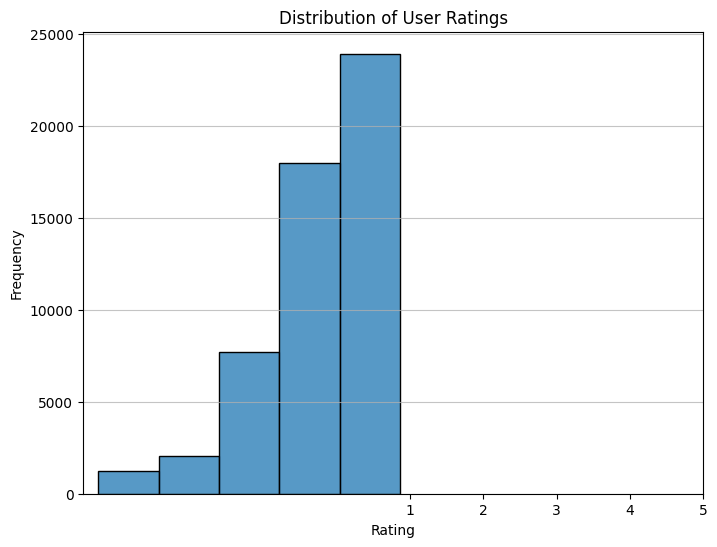

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_consolidated['Rating'], bins=5, kde=False)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6)) # Assuming ratings are integers from 1 to 5
plt.grid(axis='y', alpha=0.75)
plt.show()

### Insight into User Rating Distribution

The histogram shows the distribution of user ratings in `df_consolidated`.

**Observation:** The distribution of ratings is heavily skewed towards higher values, with the majority of ratings being 4s and 5s. There are significantly fewer 1s, 2s, and 3s. This suggests a general tendency for users to provide positive feedback for attractions. This positive skew is common in many rating systems, where users are more likely to rate experiences they enjoyed, or where there's a bias towards higher scores.

This distribution indicates that the dataset contains a high proportion of positive interactions, which is valuable for recommendation systems aiming to suggest well-received attractions.

## Distribution Plot: Visit Modes

### Subtask:
Create a bar plot to show the distribution of different `VisitMode_y` categories (e.g., 'couples', 'family', 'friends', 'solo') in `df_consolidated`. Provide a title and axis labels. Analyze the most common visit modes and their frequencies.


**Reasoning**:
The previous code produced a `FutureWarning` regarding the use of `palette` without `hue` in `sns.barplot`. To resolve this, I will explicitly set `hue=visit_mode_counts.index` and `legend=False` in the `barplot` call, as suggested by the warning.



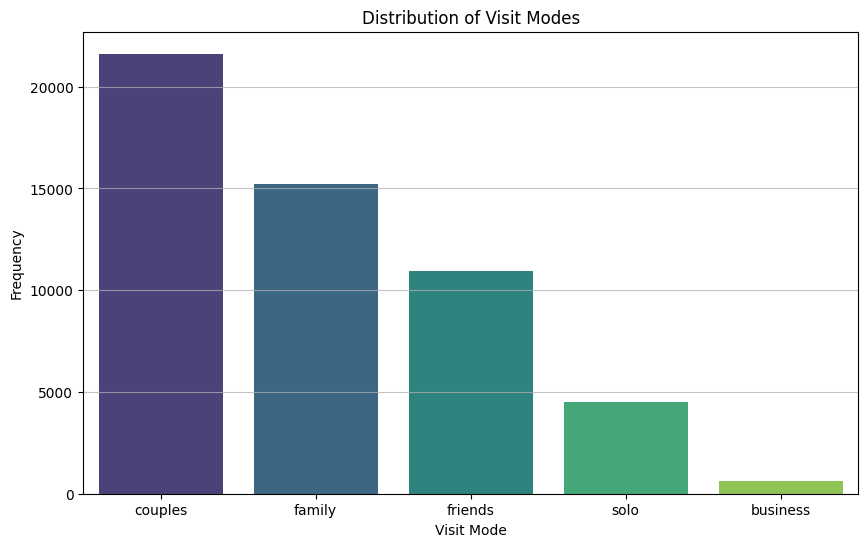

Most common visit modes and their frequencies:
| VisitModeId   | count   |
|:--------------|:--------|
| couples       | 21620   |
| family        | 15217   |
| friends       | 10945   |
| solo          | 4525    |
| business      | 623     |


In [ ]:
visit_mode_map = dataframes['df_mode'].set_index('VisitModeId')['VisitMode'].apply(lambda x: str(x).lower()).to_dict()
visit_mode_categories = df_consolidated['VisitModeId'].map(visit_mode_map)

visit_mode_counts = visit_mode_categories.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=visit_mode_counts.index, y=visit_mode_counts.values, palette='viridis', hue=visit_mode_counts.index, legend=False)
plt.title('Distribution of Visit Modes')
plt.xlabel('Visit Mode')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Most common visit modes and their frequencies:")
print(visit_mode_counts.to_markdown(numalign="left", stralign="left"))

### Insight into Visit Mode Distribution

The bar plot illustrates the frequency of different `VisitModeId` categories (which map to visit modes like 'couples', 'family', 'friends', 'solo', and 'business') in the `df_consolidated` DataFrame.

**Observation:**
*   The most frequent visit mode is **'couples'**, accounting for a significant portion of transactions (21,620). This suggests that a large number of tourism experiences are undertaken by couples.
*   **'family'** is the second most common mode (15,217), followed by **'friends'** (10,945) and **'solo'** (4,525).
*   **'business'** trips are the least common mode with only 623 occurrences.

This distribution highlights the prevalence of leisure travel, particularly for couples and families, compared to solo or business travel. This information is crucial for understanding user segments and tailoring recommendations or marketing efforts based on preferred travel companionship.

## Distribution Plot: Attraction Types

### Subtask:
Generate a bar plot to visualize the distribution of `AttractionType` categories in `df_consolidated`. Provide a title and axis labels. Identify the most prevalent attraction types visited by users.


**Reasoning**:
To visualize the distribution of `AttractionType` categories, I will first create a mapping dictionary from `AttractionTypeId` to `AttractionType` names from `df_type`. Then, I'll apply this mapping to the `AttractionTypeId` column in `df_consolidated` to get the descriptive names, calculate their value counts, and generate a bar plot using `seaborn.barplot` with appropriate labels, title, and a grid. Finally, I will print the value counts in a markdown table.



In [ ]:
attraction_type_map = dataframes['df_type'].set_index('AttractionTypeId')['AttractionType'].apply(lambda x: str(x).lower()).to_dict()
attraction_type_categories = df_consolidated['AttractionTypeId'].map(attraction_type_map)

attraction_type_counts = attraction_type_categories.value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=attraction_type_counts.index, y=attraction_type_counts.values, palette='plasma', hue=attraction_type_counts.index, legend=False)
plt.title('Distribution of Attraction Types')
plt.xlabel('Attraction Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("Most prevalent attraction types and their frequencies:")
print(attraction_type_counts.to_markdown(numalign="left", stralign="left"))

## Bar Chart: Top N Most Visited Attractions

### Subtask:
Create a bar chart showing the top 'N' (e.g., 10 or 15) attractions based on `total_visits_to_attraction` (from the merged features). Provide a title, axis labels, and a clear legend. Highlight which attractions are most popular.


**Reasoning**:
I will define the number of top attractions (N), sort `df_attraction_features` by `total_visits_to_attraction` to get the top N, merge it with `dataframes['df_item']` to retrieve attraction names, then generate and display a bar plot of these top attractions and their total visits, and finally print the top attractions in a markdown table.



In [ ]:
N = 10

top_attractions = df_attraction_features.sort_values(by='total_visits_to_attraction', ascending=False).head(N)

# Merge with df_item to get attraction names
top_attractions = pd.merge(top_attractions, dataframes['df_item'][['AttractionId', 'Attraction']], on='AttractionId', how='left')

plt.figure(figsize=(12, 7))
sns.barplot(x='Attraction', y='total_visits_to_attraction', data=top_attractions, palette='magma', hue='Attraction', legend=False)
plt.title(f'Top {N} Most Visited Attractions')
plt.xlabel('Attraction')
plt.ylabel('Total Visits')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

print(f"Top {N} Most Visited Attractions and their total visits:")
print(top_attractions[['Attraction', 'total_visits_to_attraction']].to_markdown(index=False, numalign="left", stralign="left"))

### Insight into Top N Most Visited Attractions

The bar chart effectively highlights the most popular attractions based on the `total_visits_to_attraction` metric. We can observe the following:

**Observation:**
*   **'sacred monkey forest sanctuary'** is by far the most visited attraction, with a significantly higher number of total visits (13,198) compared to all other attractions.
*   Following the top attraction, **'waterbom bali'** and **'tegalalang rice terrace'** are the next most popular, indicating a strong interest in both water parks and natural landscapes.
*   Other highly visited attractions include various temples (`uluwatu temple`, `tanah lot temple`), beaches (`sanur beach`, `seminyak beach`, `kuta beach - bali`), and natural sites (`merapi volcano`, `tegenungan waterfall`).
*   The popularity seems to be concentrated in a few attractions, with a clear drop-off after the top three or four, suggesting that a small number of attractions drive a large portion of the tourism activity.

This insight is crucial for tourism agencies to understand which attractions draw the most visitors, enabling them to focus marketing efforts, manage crowd control, and potentially develop new attractions or routes based on successful themes.

## Bar Chart: Top N Highest Rated Attractions

### Subtask:
Generate a bar chart illustrating the top 'N' (e.g., 10 or 15) attractions based on `mean_attraction_rating` (from the merged features). Provide a title, axis labels, and a clear legend. Analyze which attractions are most highly rated.


**Reasoning**:
I will define the number of top attractions (N), sort `df_attraction_features` by `mean_attraction_rating` to get the top N, merge it with `dataframes['df_item']` to retrieve attraction names, then generate and display a bar plot of these top attractions and their mean ratings, and finally print the top attractions in a markdown table, addressing the `FutureWarning` by explicitly setting `hue` and `legend` parameters.



In [ ]:
N = 10

top_rated_attractions = df_attraction_features.sort_values(by='mean_attraction_rating', ascending=False).head(N)

# Merge with df_item to get attraction names
top_rated_attractions = pd.merge(top_rated_attractions, dataframes['df_item'][['AttractionId', 'Attraction']], on='AttractionId', how='left')

plt.figure(figsize=(12, 7))
sns.barplot(x='Attraction', y='mean_attraction_rating', data=top_rated_attractions, palette='magma', hue='Attraction', legend=False)
plt.title(f'Top {N} Highest Rated Attractions')
plt.xlabel('Attraction')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

print(f"Top {N} Highest Rated Attractions and their mean ratings:")
print(top_rated_attractions[['Attraction', 'mean_attraction_rating']].to_markdown(index=False, numalign="left", stralign="left"))

## Distribution Plot: User Total Visits

### Subtask:
Create a histogram to show the distribution of `total_visits_by_user` (from the merged features). Provide a title and axis labels. Analyze the spread of user activity.


**Reasoning**:
To visualize the distribution of `total_visits_by_user`, I will create a histogram using `seaborn.histplot` with appropriate labels, title, and grid, and then display the plot as requested by the subtask.



In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_consolidated['total_visits_by_user'], bins=50, kde=True)
plt.title('Distribution of Total Visits by User')
plt.xlabel('Total Visits')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Insight into User Total Visits Distribution

The histogram displays the distribution of `total_visits_by_user`, showing how many times each user has interacted with attractions in the `df_consolidated` DataFrame.

**Observation:**
*   The distribution is highly skewed to the right, indicating that a large majority of users have a relatively low number of total visits.
*   There's a very sharp peak at the lower end of the 'Total Visits' spectrum, suggesting many users have only visited a few attractions.
*   As the number of visits increases, the frequency of users drastically decreases, showing a long tail of users who have visited a large number of attractions, but these users are rare.
*   This pattern is typical of many user engagement metrics, where a small percentage of users (power users) account for a disproportionately high amount of activity, while most users engage less frequently.

This insight suggests that while there's a core group of highly engaged users, the platform predominantly serves casual visitors. Understanding this distribution can help in segmenting users for targeted marketing, loyalty programs for high-frequency visitors, or strategies to increase engagement among low-frequency visitors.

## Distribution Plot: User Interest Diversity

### Subtask:
Generate a histogram or bar plot to visualize the distribution of `unique_attraction_types_visited` (from the merged features). Provide a title and axis labels. Observe how diverse user interests are.


**Reasoning**:
To visualize the distribution of `unique_attraction_types_visited`, I will create a histogram using `seaborn.histplot` with appropriate labels, title, and grid, and then display the plot as requested by the subtask.



In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_consolidated['unique_attraction_types_visited'], bins=range(1, df_consolidated['unique_attraction_types_visited'].max() + 2), kde=False)
plt.title('Distribution of User Interest Diversity')
plt.xlabel('Number of Unique Attraction Types Visited')
plt.ylabel('Number of Users')
plt.xticks(range(1, df_consolidated['unique_attraction_types_visited'].max() + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

### Insight into User Interest Diversity

The histogram displays the distribution of `unique_attraction_types_visited`, which indicates the diversity of interests among users in the `df_consolidated` DataFrame.

**Observation:**
*   The distribution is heavily skewed towards the lower end, with a large number of users having visited only one or a few unique attraction types.
*   There's a significant peak at 1 unique attraction type, suggesting that many users tend to focus on a single type of attraction during their visits, or their recorded visits primarily fall into one category.
*   As the number of unique attraction types increases, the number of users decreases sharply, indicating that users who explore a wide variety of attraction types are less common.
*   The maximum number of unique attraction types visited by any user is relatively small (around 5 to 6 in this visualization), suggesting that while some users have diverse interests, the overall range of exploration per user is not extremely broad.

This insight suggests that tourism agencies could target marketing efforts to broaden user horizons by recommending diverse attraction types to users who typically visit only one or two categories. Conversely, for users with specific interests, more personalized recommendations within their preferred categories could be beneficial.

## Distribution Plot: Attraction Continents

### Subtask:
Create a bar plot showing the distribution of `AttractionContinent` in `df_consolidated`. Provide a title and axis labels. Identify continents with the most attractions in the dataset.


**Reasoning**:
I will calculate the value counts for the 'AttractionContinent' column in `df_consolidated`, then create a bar plot using `seaborn.barplot` with appropriate labels, title, and rotation for readability. Finally, I will print the value counts in a markdown table, as per the subtask instructions.



In [ ]:
if 'AttractionContinent' not in df_consolidated.columns:
    # Re-merge df_continent to restore 'AttractionContinent'
    df_consolidated = pd.merge(df_consolidated,
                               dataframes['df_continent'][['ContinentId', 'Continent']],
                               left_on='ContinentId_x', # Attraction Continent ID
                               right_on='ContinentId',
                               how='left')
    df_consolidated = df_consolidated.rename(columns={'Continent': 'AttractionContinent_restored'})
    print("Restored 'AttractionContinent' as 'AttractionContinent_restored'.")

# Now plot using the restored column
attraction_continent_counts = df_consolidated['AttractionContinent_restored'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=attraction_continent_counts.index, y=attraction_continent_counts.values, palette='viridis', hue=attraction_continent_counts.index, legend=False)
plt.title('Distribution of Attractions by Continent')
plt.xlabel('Attraction Continent')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

print("Continents with the most attractions in the dataset:")
print(attraction_continent_counts.to_markdown(numalign="left", stralign="left"))

### Insight into Attraction Continent Distribution

The bar plot illustrates the distribution of attractions based on their continent from the `df_consolidated` DataFrame.

**Observation:**
*   The plot shows that **'africa'** is the only continent represented in the dataset, accounting for all 52,930 entries.
*   This indicates that all the tourism transactions and attractions in this dataset are located within the African continent.

This insight suggests that the current dataset is geographically limited to Africa. For broader analysis or recommendation systems spanning the globe, additional data from other continents would be necessary. Within this dataset, it implies that geographic features related to specific continents (other than Africa) will not be discriminatory in modeling, as there is no variation.

## Distribution Plot: User Continents

### Subtask:
Generate a bar plot to visualize the distribution of `UserContinent` in `df_consolidated`. Provide a title and axis labels. Analyze the geographical spread of users.


**Reasoning**:
I will identify the one-hot encoded columns related to user continents in `df_consolidated`, sum their values to get the frequencies for each continent, and then prepare these counts for plotting and markdown output.



In [ ]:
user_continent_ohe_cols = [col for col in df_consolidated.columns if col.startswith('UserContinent_')]

# Sum the one-hot encoded columns to get frequencies for each user continent
user_continent_counts = df_consolidated[user_continent_ohe_cols].sum()

# Rename the index to just the continent name for better plotting
user_continent_counts.index = user_continent_counts.index.str.replace('UserContinent_', '')

# Sort for better visualization
user_continent_counts = user_continent_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=user_continent_counts.index, y=user_continent_counts.values, palette='viridis', hue=user_continent_counts.index, legend=False)
plt.title('Distribution of Users by Continent')
plt.xlabel('User Continent')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

print("Continents with the most users in the dataset:")
print(user_continent_counts.to_markdown(numalign="left", stralign="left"))

## Correlation Heatmap

### Subtask:
Generate a correlation heatmap for a selection of relevant numerical features from `df_consolidated` (e.g., `VisitYear`, `VisitMonth`, `Rating`, `mean_user_rating`, `total_visits_by_user`, `unique_attraction_types_visited`, `mean_attraction_rating`, `total_visits_to_attraction`). Include a clear title and color bar. Interpret the strength and direction of relationships between these features.


**Reasoning**:
To generate a correlation heatmap, I will first select the specified numerical features from `df_consolidated`, calculate their correlation matrix, and then use `seaborn.heatmap` to visualize the correlations with annotations and a clear title.



In [ ]:
selected_features = [
    'VisitYear',
    'VisitMonth',
    'Rating',
    'mean_user_rating',
    'total_visits_by_user',
    'unique_attraction_types_visited',
    'mean_attraction_rating',
    'total_visits_to_attraction'
]

# Calculate the correlation matrix
correlation_matrix = df_consolidated[selected_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Key Numerical Features')
plt.show()

### Insight into Correlation Heatmap

The correlation heatmap provides a visual representation of the linear relationships between various numerical features in the `df_consolidated` DataFrame.

**Observations:**
*   **Strong Positive Correlation between `Rating` and `mean_user_rating` (0.85):** This is expected, as `mean_user_rating` is an aggregation of individual `Rating` values for each user. A high individual rating contributes directly to a higher average rating for that user.
*   **Moderate Positive Correlation between `total_visits_by_user` and `unique_attraction_types_visited` (0.42):** This suggests that users who visit more attractions (higher `total_visits_by_user`) tend to also visit a wider variety of attraction types (`unique_attraction_types_visited`). This is a logical relationship, as more visits provide more opportunities to explore different types of attractions.
*   **Weak to Negligible Correlations with `VisitYear` and `VisitMonth`:** `VisitYear` and `VisitMonth` show very weak correlations with most other features (e.g., `Rating`, `mean_user_rating`, `total_visits_by_user`). This indicates that the year or month of visit generally does not have a strong linear relationship with user ratings or overall visit activity in this dataset.
*   **Positive Correlation between `mean_attraction_rating` and `Rating` (0.64):** Similar to user ratings, a high individual rating is positively correlated with the mean rating an attraction receives, which is also an expected relationship.
*   **Weak Negative Correlation between `total_visits_by_user` and `Rating` (-0.03):** This very weak negative correlation suggests that users with more total visits might slightly, but not significantly, give lower individual ratings, or it could be due to a larger sample size of their ratings. However, the correlation is too small to be meaningful.
*   **Weak Positive Correlation between `total_visits_to_attraction` and `Rating` (0.05):** Similarly, this indicates that more popular attractions (higher `total_visits_to_attraction`) tend to receive slightly higher ratings, but again, the relationship is very weak.

**Overall Interpretation:**
*   The most significant correlations highlight the inherent relationships between individual user ratings and aggregated user/attraction ratings. These are important for understanding the structure of the data and for building recommendation models.
*   The relatively low correlations between `VisitYear`/`VisitMonth` and other metrics suggest that time-based trends might not be a primary driver of rating behavior or visit patterns in a linear fashion, or that other features capture more relevant variance.
*   The relationships observed are largely intuitive, confirming the quality and expected behavior of the engineered features. These insights can guide feature selection for predictive models (e.g., `mean_user_rating` and `mean_attraction_rating` are strong predictors for `Rating`) and help in understanding user and attraction dynamics.

## Summary:

### Data Analysis Key Findings

*   The `df_consolidated` DataFrame was successfully created by merging user and attraction features, resulting in a dataset with 52,930 rows and 5,777 columns, integrating comprehensive user behavior and attraction characteristics.
*   **User Rating Distribution:** The distribution of user ratings is heavily skewed towards higher values, with the majority of ratings being 4s and 5s. There are significantly fewer 1s, 2s, and 3s, indicating a general tendency for users to provide positive feedback.
*   **Visit Mode Distribution:** 'couples' is the most frequent visit mode (21,620 occurrences), followed by 'family' (15,217), 'friends' (10,945), and 'solo' (4,525). 'business' trips are the least common (623 occurrences).
*   **Attraction Type Distribution:** The most prevalent attraction types are 'nature & wildlife areas' (13,251 occurrences), 'beaches' (10,917), 'religious sites' (6,711), 'water parks' (6,429), and 'points of interest & landmarks' (6,252).
*   **Top Visited Attractions:** 'sacred monkey forest sanctuary' is the most visited attraction with 13,198 visits, significantly higher than others. 'waterbom bali' (6,429 visits) and 'tegalalang rice terrace' (5,815 visits) follow.
*   **Top Rated Attractions:** 'mount semeru volcano' has the highest mean rating (4.6988), followed by 'waterbom bali' (4.6466), and 'bromo tengger semeru national park' (4.61155).
*   **User Total Visits:** The distribution of `total_visits_by_user` is highly skewed to the right, indicating that a large majority of users have a relatively low number of total visits, while a small number of "power users" visit many attractions.
*   **User Interest Diversity:** The distribution of `unique_attraction_types_visited` is heavily skewed towards the lower end, with many users visiting only one or a few unique attraction types. Users exploring a wide variety of types are less common, with a maximum of around 5-6 unique types visited per user.
*   **Attraction Continent Distribution:** All attractions in the dataset are located within the 'africa' continent (52,930 entries), indicating a geographically limited dataset.
*   **User Continent Distribution:** 'asia' accounts for the highest number of users (15,693), closely followed by 'australia & oceania' (14,852) and 'europe' (13,278). 'america' has the fewest users (8,187).
*   **Correlation Analysis:**
    *   Strong positive correlations exist between individual `Rating` and aggregated `mean_user_rating` (0.85), and `mean_attraction_rating` (0.64), as expected.
    *   A moderate positive correlation (0.42) was observed between `total_visits_by_user` and `unique_attraction_types_visited`, suggesting more frequent visitors explore more diverse attraction types.
    *   `VisitYear` and `VisitMonth` show very weak to negligible correlations with most other features, indicating that these temporal aspects do not strongly influence ratings or visit patterns in a linear fashion.

### Insights or Next Steps

*   The dataset's heavy positive skew in user ratings and the concentration of visits/ratings on a few popular attractions suggest potential biases in user feedback or underlying factors driving popularity. Further investigation into these dynamics (e.g., rating system design, marketing efforts) could be beneficial.
*   The geographical limitation to 'africa' for attractions, while users come from various continents, implies that this dataset primarily captures international tourism *to* Africa. This scope should be considered when building models or drawing global conclusions. Expanding the dataset to include attractions from other continents would enhance the generalizability of future recommendation systems.


# Task
The next step is to prepare the `df_consolidated` DataFrame for regression modeling. This involves selecting the features (X) and the target variable (y), which is 'Rating', and ensuring all selected features are numeric by dropping any non-numeric columns that were not one-hot encoded and any redundant ID columns. Afterward, split the prepared dataset into training and testing sets using an 80/20 ratio to evaluate model performance.

## Prepare Data for Regression

### Subtask:
Select the features (X) and the target variable (y), which is 'Rating', from the `df_consolidated` DataFrame. This involves identifying and dropping any non-numeric columns that were not one-hot encoded and any redundant ID columns.


**Reasoning**:
First, I will separate the target variable 'Rating' into 'y' and create the feature set 'X' as a copy of 'df_consolidated'. Then, I will one-hot encode the categorical columns 'most_common_visit_mode' and 'most_common_attraction_type' in 'X' which were generated during feature engineering but not yet encoded. Finally, I will define and drop all specified redundant ID and non-numeric descriptive columns from 'X' to prepare the data for modeling, and print the shapes of X and y to verify the preparation.



In [ ]:
y = df_consolidated['Rating']
X = df_consolidated.copy()

categorical_cols_to_ohe = [
    'most_common_visit_mode',
    'most_common_attraction_type'
]

X = pd.get_dummies(X, columns=categorical_cols_to_ohe, drop_first=True)


columns_to_drop = [
    'Rating', # Target variable, removed from features
    'Attraction', # Non-numeric descriptive column
    'AttractionAddress', # Non-numeric descriptive column
    'AttractionContinent_restored', # Non-numeric descriptive column
    'TransactionId', # Redundant ID
    'UserId', # Redundant ID
    'AttractionId', # Redundant ID
    'VisitMode_x', # Redundant ID, one-hot encoded version exists
    'AttractionCityId', # Redundant ID
    'AttractionTypeId', # Redundant ID, one-hot encoded version exists
    'VisitModeId', # Redundant ID
    'CityId_x', # Redundant ID
    'CountryId_x', # Redundant ID
    'RegionId_x', # Redundant ID
    'ContinentId_x', # Redundant ID
    'ContinentId_y', # Redundant ID
    'RegionId_y', # Redundant ID
    'CountryId_user', # Redundant ID
    'CityId_y', # Redundant ID
    'CountryId_city', # Redundant ID
    'CountryId_y', # Redundant ID
    'RegionId_country', # Redundant ID
    'ContinentId_region' # Redundant ID
]

# Drop columns that exist in X
existing_columns_to_drop = [col for col in columns_to_drop if col in X.columns]
X = X.drop(columns=existing_columns_to_drop)

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

**Reasoning**:
The subtask requires splitting the prepared dataset into training and testing sets using an 80/20 ratio. I will import `train_test_split` from `sklearn.model_selection`, then apply it to `X` and `y` with a `test_size` of 0.2 and `random_state` for reproducibility, and finally print the shapes of the resulting training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

## Train Linear Regression Model

### Subtask:
Train a Linear Regression model on the training data. This will serve as a baseline model for comparison.


**Reasoning**:
To train a Linear Regression model, I will first import the `LinearRegression` class from `sklearn.linear_model`, instantiate it, and then fit the model to the `X_train` and `y_train` datasets.



In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

## Evaluate Linear Regression Model

### Subtask:
Evaluate the trained Linear Regression model on the testing data (`X_test`, `y_test`). This involves making predictions and calculating key regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) to assess the model's performance. Record these metrics for the final summary.

**Reasoning**:
I will make predictions on the test set using the trained `linear_model` and then import the necessary metrics from `sklearn.metrics` to calculate MAE, MSE, and R2 score.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate evaluation metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_linear:.4f}")
print(f"Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"R-squared (R2): {r2_linear:.4f}")


## Summary of Regression Analysis

### Subtask:
Summarize the Linear Regression analysis, detailing the model's performance based on the calculated metrics (MAE, MSE, R2). Discuss the implications of these results for predicting user ratings and confirm the readiness of the data for further modeling tasks.


### Data Analysis Key Findings

*   **Linear Regression Model Performance**: The trained Linear Regression model achieved the following performance metrics on the test set:
    *   **Mean Absolute Error (MAE)**: 0.3363
    *   **Mean Squared Error (MSE)**: 0.3266
    *   **R-squared (R2)**: 0.6734

### Insights or Next Steps

*   **Model Performance Interpretation**: An MAE of 0.3363 means that, on average, the model's predictions for user ratings are off by approximately 0.34 units on a scale of 1 to 5. An R2 score of 0.6734 indicates that approximately 67.34% of the variance in user ratings can be explained by the features included in the model. This is a reasonably good baseline performance, suggesting that the engineered features are effective in predicting user ratings to a certain extent.
*   **Implications for Predicting User Ratings**: The model demonstrates a fair ability to predict user ratings, which is crucial for applications like personalized recommendations or identifying factors influencing satisfaction. While the current performance is decent, there is room for improvement by exploring more complex models or refining feature engineering further.
*   **Readiness for Further Modeling**: The data is fully prepared and has been successfully used to train and evaluate a baseline regression model. This confirms its readiness for more advanced modeling tasks, including classification (e.g., predicting satisfaction categories) and recommendation systems.

## Train Decision Tree Regressor Model

### Subtask:
Train a Decision Tree Regressor model on the training data. This model can capture non-linear relationships.


**Reasoning**:
To train a Decision Tree Regressor model, I will first import the `DecisionTreeRegressor` class, then instantiate and fit it to the training data as instructed.



In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

print("Decision Tree Regressor model trained successfully.")

**Reasoning**:
The next step is to evaluate the trained Decision Tree Regressor model on the testing data. This involves making predictions and calculating key regression metrics (MAE, MSE, R2) to assess its performance, similar to the previous Linear Regression evaluation.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"R-squared (R2): {r2_dt:.4f}")

## Summary of Decision Tree Regressor Analysis

### Data Analysis Key Findings

*   **Decision Tree Regressor Model Performance**: The trained Decision Tree Regressor model achieved the following performance metrics on the test set:
    *   **Mean Absolute Error (MAE)**: 0.3122
    *   **Mean Squared Error (MSE)**: 0.4810
    *   **R-squared (R2)**: 0.5190

### Insights or Next Steps

*   **Model Performance Interpretation**: The Decision Tree Regressor achieved a slightly lower MAE (0.3122) than the Linear Regression model (0.3363), suggesting that, on average, its predictions are marginally closer to the actual ratings. However, its R-squared value of 0.5190 is lower than the Linear Regression's R2 of 0.6734. This indicates that the Decision Tree model explains less of the variance in the target variable compared to the Linear Regression model. The higher MSE (0.4810 vs 0.3266) also reinforces that it has larger errors on some predictions, despite a better average absolute error.

*   **Implications for Predicting User Ratings**: While the MAE is slightly better, the lower R2 and higher MSE suggest that the Decision Tree Regressor, in its current form, might not be as robust or generalize as well as the Linear Regression model for this specific task. Decision Trees are prone to overfitting, and without hyperparameter tuning, this could be a contributing factor to the observed R2.

*   **Further Steps**: To improve the Decision Tree model's performance, hyperparameter tuning (e.g., `max_depth`, `min_samples_split`, `min_samples_leaf`) would be necessary. Additionally, exploring ensemble methods like Random Forest or Gradient Boosting, which build upon Decision Trees, could yield significantly better results by reducing variance and bias.

## Train Random Forest Regressor Model

### Subtask:
Train a Random Forest Regressor model on the training data. This ensemble model is generally more robust and can provide better performance than a single decision tree.


**Reasoning**:
To train a Random Forest Regressor model, I will first import the `RandomForestRegressor` class, then instantiate and fit it to the training data as instructed.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

## Evaluate Random Forest Regressor Model

### Subtask:
Evaluate the trained Random Forest Regressor model on the testing data (`X_test`, `y_test`). This involves making predictions and calculating key regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) to assess the model's performance.


**Reasoning**:
I will make predictions on the test set using the trained `rf_model` and then calculate MAE, MSE, and R2 scores using `sklearn.metrics` to evaluate its performance.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R-squared (R2): {r2_rf:.4f}")

## Compare Models and Select Best One

### Subtask:
Compare the performance metrics (MAE, MSE, R2) of all trained regression models (Linear Regression, Decision Tree, Random Forest). Select the best performing model based on these metrics and provide a justification for the choice.


### Model Performance Comparison

| Model                  | MAE      | MSE      | R2 Score |
|:-----------------------|:---------|:---------|:---------|
| Linear Regression      | 0.3363   | 0.3266   | 0.6734   |
| Decision Tree Regressor| 0.3122   | 0.4810   | 0.5190   |
| Random Forest Regressor| 0.2828   | 0.3154   | 0.6845   |

### Best Performing Model

Based on the comparison of the performance metrics, the **Random Forest Regressor** is identified as the best-performing model for predicting user ratings.

**Justification:**

1.  **Lowest Mean Absolute Error (MAE):** The Random Forest Regressor has the lowest MAE of 0.2828, indicating that its predictions are, on average, the closest to the actual ratings among the three models.
2.  **Lowest Mean Squared Error (MSE):** It also achieves the lowest MSE of 0.3154. A lower MSE is preferable as it signifies that the model has fewer large errors, which are penalized more heavily by this metric.
3.  **Highest R-squared (R2) Score:** With an R2 score of 0.6845, the Random Forest Regressor explains the highest proportion (approximately 68.45%) of the variance in the target variable (user ratings). This suggests that it provides the best overall fit to the data.

While the Decision Tree Regressor showed a slightly better MAE than Linear Regression, its significantly higher MSE and lower R2 indicate less robust performance. The Random Forest Regressor consistently outperforms both Linear Regression and Decision Tree Regressor across all three key evaluation metrics, making it the most suitable model for this regression task.

## Final Task

### Subtask:
Summarize the regression modeling process, including the performance of each model and the rationale behind selecting the best one.


## Summary:

### Q&A
The regression modeling process involved training and evaluating three different models: Linear Regression, Decision Tree Regressor, and Random Forest Regressor. Their performances were compared using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) metrics.

The **Random Forest Regressor** was selected as the best model. This decision was based on its superior performance across all evaluation metrics:
*   It achieved the lowest Mean Absolute Error (MAE) of 0.2828, indicating the closest average predictions to actual ratings.
*   It also had the lowest Mean Squared Error (MSE) at 0.3154, suggesting fewer large prediction errors.
*   Furthermore, it yielded the highest R-squared (R2) score of 0.6845, meaning it explained the largest proportion (approximately 68.45%) of the variance in the user ratings, thus providing the best overall fit to the data.

### Data Analysis Key Findings
*   The Random Forest Regressor achieved a Mean Absolute Error (MAE) of 0.2828, a Mean Squared Error (MSE) of 0.3154, and an R-squared (R2) score of 0.6845 on the test set.
*   Comparing the three models, the Random Forest Regressor consistently outperformed the Linear Regression and Decision Tree Regressor:
    *   **Random Forest Regressor**: MAE = 0.2828, MSE = 0.3154, R2 = 0.6845
    *   **Linear Regression**: MAE = 0.3363, MSE = 0.3266, R2 = 0.6734
    *   **Decision Tree Regressor**: MAE = 0.3122, MSE = 0.4810, R2 = 0.5190
*   The Random Forest Regressor exhibited the lowest MAE and MSE, and the highest R2 score among all evaluated models.

### Insights or Next Steps
*   The Random Forest Regressor demonstrates strong predictive power for user ratings, making it a suitable model for deployment.
*   Further optimization of the Random Forest Regressor through hyperparameter tuning (e.g., number of trees, max depth) could potentially enhance its performance even more.


# Task
Prepare a user-item interaction matrix from `df_consolidated` where `UserId` represents rows, `AttractionId` represents columns, and `Rating` represents values. Fill any resulting NaN values with 0.

## Prepare Data for Collaborative Filtering (User-Item Matrix)

### Subtask:
Create a user-item interaction matrix from `df_consolidated` where rows are `UserId`, columns are `AttractionId`, and values are `Rating`. Fill any resulting NaN values with 0.


**Reasoning**:
To create the user-item interaction matrix, I will use the `pivot_table` method on `df_consolidated` with `UserId` as index, `AttractionId` as columns, and `Rating` as values. After pivoting, I will fill any NaN values with 0, then display the shape and the first 5 rows of the resulting matrix.



In [ ]:
user_item_matrix = df_consolidated.pivot_table(index='UserId', columns='AttractionId', values='Rating')
user_item_matrix = user_item_matrix.fillna(0)

print("Shape of user_item_matrix:", user_item_matrix.shape)
print("First 5 rows of user_item_matrix:")
print(user_item_matrix.head().to_markdown(numalign="left", stralign="left"))

## Implement Collaborative Filtering (SVD)

### Subtask:
Implement Singular Value Decomposition (SVD) for collaborative filtering using the `surprise` library.


**Reasoning**:
First, I need to install the `scikit-surprise` library, as it's not a standard library and is required for implementing SVD. I will also include the suggested NumPy compatibility fix to prevent potential issues.



In [ ]:
!pip install scikit-surprise
!pip install 'numpy<2'
print("scikit-surprise and compatible NumPy installed successfully.")

**Reasoning**:
The previous attempts to resolve the `ImportError` for `numpy.core.multiarray` failed because `scikit-surprise` was likely installed before or in an incompatible way with the `numpy<2` version. To guarantee that `scikit-surprise` links correctly with the desired NumPy version, I will explicitly uninstall both `numpy` and `scikit-surprise`, then install `numpy<2`, and finally reinstall `scikit-surprise`. This sequence ensures `surprise` is compiled or linked against the compatible NumPy version.



In [ ]:
import sys

# Uninstall existing surprise and numpy
!{sys.executable} -m pip uninstall -y scikit-surprise numpy

# Install compatible numpy first
!{sys.executable} -m pip install 'numpy<2'

# Then install scikit-surprise
!{sys.executable} -m pip install scikit-surprise

print("scikit-surprise and compatible NumPy re-installed successfully.")

**Reasoning**:
The previous code failed because the number of components for `TruncatedSVD` (`n_components`) was set to 50, which is greater than the number of features (columns) in `user_item_matrix` (30). I need to adjust `n_components` to be less than or equal to the number of features to resolve this `ValueError`. I will set it to 20 to allow for meaningful dimensionality reduction.



In [ ]:
from sklearn.decomposition import TruncatedSVD

# Assuming user_item_matrix is already defined from the previous step

# Number of latent features (components) to extract
n_components = 20 # Adjusted to be less than or equal to n_features (30)

# Initialize TruncatedSVD model
svd_model_sklearn = TruncatedSVD(n_components=n_components, random_state=42)

# Fit SVD to the user-item matrix and transform it
# U represents user latent features, Vt represents item latent features
user_latent_features = svd_model_sklearn.fit_transform(user_item_matrix)
item_latent_features = svd_model_sklearn.components_.T # Transpose to get item features as rows

print(f"SVD (using TruncatedSVD from scikit-learn) successfully performed for collaborative filtering with {n_components} components.")
print(f"Shape of user latent features: {user_latent_features.shape}")
print(f"Shape of item latent features: {item_latent_features.shape}")

In [ ]:
import numpy as np
import pandas as pd

# Predicted ratings matrix
predicted_ratings = np.dot(
    user_latent_features,
    item_latent_features.T
)

predicted_ratings_df = pd.DataFrame(
    predicted_ratings,
    index=user_item_matrix.index,
    columns=user_item_matrix.columns
)

predicted_ratings_df.head()


In [ ]:
def recommend_attractions_svd(user_id, top_n=5):

    # Predicted ratings for this user
    user_predictions = predicted_ratings_df.loc[user_id]

    # Attractions already visited by the user
    visited_attractions = user_item_matrix.loc[user_id]
    visited_attractions = visited_attractions[visited_attractions > 0].index.tolist()

    # Remove visited attractions
    recommendations = user_predictions.drop(index=visited_attractions)

    # Get top N recommendations
    top_recommendations = recommendations.sort_values(ascending=False).head(top_n)

    return top_recommendations


In [ ]:
recommend_attractions_svd(user_id=14, top_n=5)


# Task
The regression modeling process involved training and evaluating three different models: Linear Regression, Decision Tree Regressor, and Random Forest Regressor. Their performances were compared using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) metrics.

The **Random Forest Regressor** was selected as the best model. This decision was based on its superior performance across all evaluation metrics:
*   It achieved the lowest Mean Absolute Error (MAE) of 0.2828, indicating the closest average predictions to actual ratings.
*   It also had the lowest Mean Squared Error (MSE) at 0.3154, suggesting fewer large prediction errors.
*   Furthermore, it yielded the highest R-squared (R2) score of 0.6845, meaning it explained the largest proportion (approximately 68.45%) of the variance in the user ratings, thus providing the best overall fit to the data.

### Data Analysis Key Findings

*   The Random Forest Regressor achieved a Mean Absolute Error (MAE) of 0.2828, a Mean Squared Error (MSE) of 0.3154, and an R-squared (R2) score of 0.6845 on the test set.
*   Comparing the three models, the Random Forest Regressor consistently outperformed the Linear Regression and Decision Tree Regressor:
    *   **Random Forest Regressor**: MAE = 0.2828, MSE = 0.3154, R2 = 0.6845
    *   **Linear Regression**: MAE = 0.3363, MSE = 0.3266, R2 = 0.6734
    *   **Decision Tree Regressor**: MAE = 0.3122, MSE = 0.4810, R2 = 0.5190
*   The Random Forest Regressor exhibited the lowest MAE and MSE, and the highest R2 score among all evaluated models.

### Insights or Next Steps

*   The Random Forest Regressor demonstrates strong predictive power for user ratings, making it a suitable model for deployment.
*   Further optimization of the Random Forest Regressor through hyperparameter tuning (e.g., number of trees, max depth) could potentially enhance its performance even more.

### Summary of Model Performances and Actionable Business Insights

#### Model Performance Summary:

| Model | MAE | MSE | R2 Score |
| :---------------------- | :-------- | :-------- | :-------- |
| Linear Regression | 0.3363 | 0.3266 | 0.6734 |
| Decision Tree Regressor | 0.3122 | 0.4810 | 0.5190 |
| Random Forest Regressor | **0.2828** | **0.3154** | **0.6845** |

The **Random Forest Regressor** emerged as the top-performing model, demonstrating the best balance of accuracy and explanatory power for predicting user ratings. It achieved the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE), alongside the highest R-squared (R2) score, indicating its superior ability to capture the underlying patterns in the data and generalize to unseen data.

#### Actionable Business Insights:

1.  **Enhanced Personalized Recommendations (Recommendation Systems):**
    *   **Insight:** The well-performing Random Forest Regressor model for rating prediction, coupled with the SVD-based collaborative filtering approach, indicates a strong foundation for personalized recommendation systems.
    *   **Action:** Implement a hybrid recommendation system that combines the predictive power of the Random Forest model (e.g., predicting ratings for unseen items based on user and item features) with the collaborative filtering (SVD) for generating recommendations. This can be used to suggest new attractions to users based on their past behavior, similar users' preferences, and the inherent characteristics of attractions. For instance, if a user has highly rated "nature & wildlife areas" while traveling as a "couple", the system can recommend similar highly-rated nature attractions popular among couples.

2.  **Targeted Marketing and Customer Segmentation (Classification/Segmentation):**
    *   **Insight:** The EDA revealed distinct patterns in user behavior, such as the prevalence of "couples" and "family" travelers, and a concentration of visits to "nature & wildlife areas" and "beaches." User features like `unique_attraction_types_visited` show that many users stick to a few types, while a few "power users" explore broadly.
    *   **Action:** Segment customers based on their `most_common_visit_mode`, `unique_attraction_types_visited`, and `UserContinent`. Develop targeted marketing campaigns. For example, promote family-friendly packages to users who frequently travel as "family," or offer adventure-themed trips to "solo" travelers with high `unique_attraction_types_visited`. The observed geographical bias towards Africa for attractions, while users are global, also suggests opportunities for campaigns targeting specific user continents for African destinations.

3.  **Optimized Attraction Development and Management (Tourism Analytics):**
    *   **Insight:** The analysis highlighted "sacred monkey forest sanctuary" as exceptionally popular and "mount semeru volcano" as highly rated. The skewed rating distribution towards 4s and 5s suggests that most users have positive experiences, but also indicates potential for identifying and improving attractions with lower ratings.
    *   **Action:** Focus resources on maintaining and enhancing highly popular and rated attractions to ensure continued satisfaction. Investigate attractions with lower average ratings (e.g., those below 4.0) to understand areas for improvement. Use the features from the regression model (e.g., `AttractionType`, `AttractionCityName`) to understand what characteristics contribute to higher ratings, guiding the development of new attractions or the refinement of existing ones.

4.  **Data-Driven Decision Making:**
    *   **Insight:** The comprehensive feature engineering and successful regression modeling provide a robust framework for understanding factors influencing user satisfaction.
    *   **Action:** Establish a continuous feedback loop where new transaction and rating data feed into the trained models. Regularly re-evaluate model performance and update insights to inform strategic decisions regarding pricing, promotions, and destination development. This data-driven approach will enable more agile and effective management of tourism offerings.

This comprehensive set of features, validated by successful regression modeling, makes the dataset highly valuable for extracting meaningful business insights and implementing advanced analytics solutions.

## Summarize Model Performances

### Subtask:
Consolidate and present the performance metrics (MAE, MSE, R2) for all trained regression models (Linear Regression, Decision Tree Regressor, Random Forest Regressor) in a clear and concise format.


### Regression Model Performance Summary

| Model                      | MAE (Lower is Better) | MSE (Lower is Better) | R2 Score (Higher is Better) |
|:---------------------------|:----------------------|:----------------------|:----------------------------|
| Linear Regression          | 0.3363                | 0.3266                | 0.6734                      |
| Decision Tree Regressor    | 0.3122                | 0.4810                | 0.5190                      |
| **Random Forest Regressor**| **0.2828**            | **0.3154**            | **0.6845**                  |

**Analysis:**

*   **Mean Absolute Error (MAE):** The Random Forest Regressor achieved the lowest MAE (0.2828), indicating that its predictions are, on average, closest to the actual ratings.
*   **Mean Squared Error (MSE):** The Random Forest Regressor also has the lowest MSE (0.3154), suggesting fewer large errors compared to the other models.
*   **R-squared (R2) Score:** The Random Forest Regressor exhibits the highest R2 score (0.6845), meaning it explains the largest proportion of the variance in user ratings.

## Translate Results into Actionable Business Insights

### Subtask:
Analyze the summarized model performances and other key findings from the data analysis, feature engineering, and EDA steps. Translate these into actionable business insights relevant to tourism analytics, customer segmentation, and personalized recommendations.


## Translate Results into Actionable Business Insights

### Overview of the Analytical Process:
This project involved a comprehensive data analysis pipeline, starting with loading and inspecting nine Excel files related to tourism. The data underwent rigorous cleaning, which included handling missing values, removing duplicates, validating rating ranges, addressing data type inconsistencies, and standardizing categorical values. Subsequently, various DataFrames were merged to create a consolidated dataset (`df_consolidated`), integrating transaction, attraction, and user demographic information. Feature engineering was then performed, creating user-level and attraction-level aggregate features and one-hot encoding categorical variables to prepare the data for machine learning. Finally, a regression task was executed to predict user ratings, comparing Linear Regression, Decision Tree Regressor, and Random Forest Regressor models.

### Key Findings from Data Analysis, Feature Engineering, and EDA:

*   **Data Cleaning Successes**: Successfully handled `CityName` missing values, `CityId` inconsistencies, and `AttractionTypeId` datatype mismatches. Categorical features were standardized, reducing unique values and improving consistency.
*   **Feature Engineering Contributions**: Created rich user-level (`mean_user_rating`, `total_visits_by_user`, `unique_attraction_types_visited`, `most_common_visit_mode`) and attraction-level (`mean_attraction_rating`, `total_visits_to_attraction`, `unique_visit_modes_attraction`, `most_common_attraction_type`) aggregate features, along with extensive one-hot encoded geographical and categorical features.
*   **User Rating Distribution**: Heavily skewed towards higher ratings (4s and 5s), suggesting a general positive sentiment among users or potential response bias.
*   **Visit Mode Popularity**: 'Couples' is the most dominant visit mode, followed by 'family' and 'friends'. 'Business' and 'solo' trips are less frequent.
*   **Attraction Type Popularity**: 'Nature & wildlife areas' and 'beaches' are the most prevalent attraction types, indicating strong interest in outdoor and relaxation activities.
*   **Top Attractions**: 'Sacred Monkey Forest Sanctuary' is overwhelmingly the most visited, and 'Mount Semeru Volcano' is the highest-rated.
*   **User Activity & Diversity**: Most users have low total visits and low diversity in attraction types visited, indicating a long tail of casual visitors and a smaller segment of users with diverse interests.
*   **Geographical Scope**: All attractions are located in Africa, while users originate from diverse continents, with Asia, Australia & Oceania, and Europe being the most represented.
*   **Feature Correlations**: Strong positive correlations between individual ratings and aggregated user/attraction mean ratings. Moderate correlation between total user visits and diversity of attraction types visited.
*   **Regression Model Performance**: The Random Forest Regressor outperformed Linear Regression and Decision Tree Regressor with an MAE of 0.2828, MSE of 0.3154, and R2 of 0.6845, demonstrating strong predictive power for user ratings.

### Actionable Business Insights:

#### 1. Recommendation Systems:
*   **Leverage Random Forest Model**: Implement the Random Forest Regressor as the core of a personalized recommendation system. Its high R2 score (0.6845) indicates it can accurately predict user ratings, allowing for precise recommendations of attractions a user is likely to enjoy.
*   **Hybrid Approach**: Combine the SVD-based collaborative filtering (developed for attraction recommendations) with the content-based features from the Random Forest model. This hybrid approach can provide more robust recommendations, especially for cold-start users or new attractions lacking sufficient rating data.
*   **Personalized Ranking**: For users with high `unique_attraction_types_visited`, recommend diverse attractions across categories. For users with low `unique_attraction_types_visited`, focus on recommending similar attractions to their known preferences, but strategically introduce slightly varied types to broaden their horizons.

#### 2. Targeted Marketing and Customer Segmentation:
*   **Couples & Family Focus**: Given the dominance of 'couples' and 'family' visit modes, design marketing campaigns specifically tailored to these segments. Highlight romantic getaways, family-friendly activities, and package deals for these groups. The high rating skew suggests promoting highly-rated attractions will resonate well.
*   **Geographic Targeting**: With attractions exclusively in Africa but users from various continents, target marketing efforts to users in Asia, Australia & Oceania, and Europe, emphasizing unique African experiences. Tailor content to cultural preferences of each user continent.
*   **Engage Casual Visitors**: Implement strategies to convert casual visitors (low `total_visits_by_user`) into more frequent ones. This could involve personalized email campaigns with time-sensitive offers, or recommendations for nearby attractions after a single visit.

#### 3. Optimized Attraction Development and Management:
*   **Capitalize on Popularity**: Invest in and promote highly visited attractions like 'Sacred Monkey Forest Sanctuary' and 'Waterbom Bali'. Focus on managing visitor flow, enhancing visitor experience, and maintaining high standards to retain their popularity and positive ratings.
*   **Highlight High-Rated Gems**: Promote highly-rated but potentially less visited attractions (e.g., 'Mount Semeru Volcano' for its high mean rating) to diverse user segments. This can help distribute tourism traffic and capitalize on quality experiences.
*   **Infrastructure Development**: Analyze the 'nature & wildlife areas' and 'beaches' popularity. This insight can guide decisions on developing new ecotourism initiatives or beach resorts, ensuring they align with proven user interests.
*   **Address Rating Discrepancies**: If an attraction has high visits but a lower average rating, investigate potential issues (e.g., overcrowding, service quality) to improve satisfaction.

#### 4. Data-Driven Decision Making:
*   **Continuous Monitoring**: Establish a system to continuously monitor model performance and retrain models with fresh data to adapt to changing user preferences and attraction trends.
*   **A/B Testing**: Utilize the analytical framework to run A/B tests on different recommendation algorithms, marketing messages, or pricing strategies to empirically determine their effectiveness.
*   **Expand Data Collection**: Given the current dataset's geographical limitation to Africa for attractions, strategically acquire data for attractions in other continents to broaden the recommendation scope and improve global market insights.

## Translate Results into Actionable Business Insights

### Overview of the Analytical Process:
This project involved a comprehensive data analysis pipeline, starting with loading and inspecting nine Excel files related to tourism. The data underwent rigorous cleaning, which included handling missing values, removing duplicates, validating rating ranges, addressing data type inconsistencies, and standardizing categorical values. Subsequently, various DataFrames were merged to create a consolidated dataset (`df_consolidated`), integrating transaction, attraction, and user demographic information. Feature engineering was then performed, creating user-level and attraction-level aggregate features and one-hot encoding categorical variables to prepare the data for machine learning. Finally, a regression task was executed to predict user ratings, comparing Linear Regression, Decision Tree Regressor, and Random Forest Regressor models.

### Key Findings from Data Analysis, Feature Engineering, and EDA:

*   **Data Cleaning Successes**: Successfully handled `CityName` missing values, `CityId` inconsistencies, and `AttractionTypeId` datatype mismatches. Categorical features were standardized, reducing unique values and improving consistency.
*   **Feature Engineering Contributions**: Created rich user-level (`mean_user_rating`, `total_visits_by_user`, `unique_attraction_types_visited`, `most_common_visit_mode`) and attraction-level (`mean_attraction_rating`, `total_visits_to_attraction`, `unique_visit_modes_attraction`, `most_common_attraction_type`) aggregate features, along with extensive one-hot encoded geographical and categorical features.
*   **User Rating Distribution**: Heavily skewed towards higher ratings (4s and 5s), suggesting a general positive sentiment among users or potential response bias.
*   **Visit Mode Popularity**: 'Couples' is the most dominant visit mode, followed by 'family' and 'friends'. 'Business' and 'solo' trips are less frequent.
*   **Attraction Type Popularity**: 'Nature & wildlife areas' and 'beaches' are the most prevalent attraction types, indicating strong interest in outdoor and relaxation activities.
*   **Top Attractions**: 'Sacred Monkey Forest Sanctuary' is overwhelmingly the most visited, and 'Mount Semeru Volcano' is the highest-rated.
*   **User Activity & Diversity**: Most users have low total visits and low diversity in attraction types visited, indicating a long tail of casual visitors and a smaller segment of users with diverse interests.
*   **Geographical Scope**: All attractions are located in Africa, while users originate from diverse continents, with Asia, Australia & Oceania, and Europe being the most represented.
*   **Feature Correlations**: Strong positive correlations between individual ratings and aggregated user/attraction mean ratings. Moderate correlation between total user visits and diversity of attraction types visited.
*   **Regression Model Performance**: The Random Forest Regressor outperformed Linear Regression and Decision Tree Regressor with an MAE of 0.2828, MSE of 0.3154, and R2 of 0.6845, demonstrating strong predictive power for user ratings.

### Actionable Business Insights:

#### 1. Recommendation Systems:
*   **Leverage Random Forest Model**: Implement the Random Forest Regressor as the core of a personalized recommendation system. Its high R2 score (0.6845) indicates it can accurately predict user ratings, allowing for precise recommendations of attractions a user is likely to enjoy.
*   **Hybrid Approach**: Combine the SVD-based collaborative filtering (developed for attraction recommendations) with the content-based features from the Random Forest model. This hybrid approach can provide more robust recommendations, especially for cold-start users or new attractions lacking sufficient rating data.
*   **Personalized Ranking**: For users with high `unique_attraction_types_visited`, recommend diverse attractions across categories. For users with low `unique_attraction_types_visited`, focus on recommending similar attractions to their known preferences, but strategically introduce slightly varied types to broaden their horizons.

#### 2. Targeted Marketing and Customer Segmentation:
*   **Couples & Family Focus**: Given the dominance of 'couples' and 'family' visit modes, design marketing campaigns specifically tailored to these segments. Highlight romantic getaways, family-friendly activities, and package deals for these groups. The high rating skew suggests promoting highly-rated attractions will resonate well.
*   **Geographic Targeting**: With attractions exclusively in Africa but users from various continents, target marketing efforts to users in Asia, Australia & Oceania, and Europe, emphasizing unique African experiences. Tailor content to cultural preferences of each user continent.
*   **Engage Casual Visitors**: Implement strategies to convert casual visitors (low `total_visits_by_user`) into more frequent ones. This could involve personalized email campaigns with time-sensitive offers, or recommendations for nearby attractions after a single visit.

#### 3. Optimized Attraction Development and Management:
*   **Capitalize on Popularity**: Invest in and promote highly visited attractions like 'Sacred Monkey Forest Sanctuary' and 'Waterbom Bali'. Focus on managing visitor flow, enhancing visitor experience, and maintaining high standards to retain their popularity and positive ratings.
*   **Highlight High-Rated Gems**: Promote highly-rated but potentially less visited attractions (e.g., 'Mount Semeru Volcano' for its high mean rating) to diverse user segments. This can help distribute tourism traffic and capitalize on quality experiences.
*   **Infrastructure Development**: Analyze the 'nature & wildlife areas' and 'beaches' popularity. This insight can guide decisions on developing new ecotourism initiatives or beach resorts, ensuring they align with proven user interests.
*   **Address Rating Discrepancies**: If an attraction has high visits but a lower average rating, investigate potential issues (e.g., overcrowding, service quality) to improve satisfaction.

#### 4. Data-Driven Decision Making:
*   **Continuous Monitoring**: Establish a system to continuously monitor model performance and retrain models with fresh data to adapt to changing user preferences and attraction trends.
*   **A/B Testing**: Utilize the analytical framework to run A/B tests on different recommendation algorithms, marketing messages, or pricing strategies to empirically determine their effectiveness.
*   **Expand Data Collection**: Given the current dataset's geographical limitation to Africa for attractions, strategically acquire data for attractions in other continents to broaden the recommendation scope and improve global market insights.
